<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
      <li><span style="font-weight: normal;"><a href="#DP_FeatureEng">Feature Engineering</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#most-used-feature-engineering-techniques">Bucketing</a></span></li>
        <li><span style="font-weight: normal;"><a href="#1-outliers">Outliers</a></span></li>
        <li><span style="font-weight: normal;"><a href="#2-missing-values">Missing Values</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#categorical-variables-aproach">Categorical Variables Approach</a></span></li>
          <li><span style="font-weight: normal;"><a href="#fill-missing-values-with-central-tendency-measures">Fill Missing Values with Central Tendency Measures</a></span></li>
          <li><span style="font-weight: normal;"><a href="#knn-imputer">KNN Imputer</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#3-encoding">Categorical Variables (Encoding)</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#target-encoding">Target Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#label-ordinal-encoding">Label/Ordinal Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#one-hot-encoding">One-Hot Encoding</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#4-multicollinearity">Multicollinearity</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#variance-inflation-factor-vif">Variance Inflation Factor (VIF)</a></span></li>
        </ol>
      </ol>
      <li><span style="font-weight: normal;"><a href="#🎚️-feature-selection">Feature Selection</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#filter-methods">Filter Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#correlation-coefficient">Spearman Correlations</a></span></li>
          <li><span style="font-weight: normal;"><a href="#chi-square-test">Chi-Square Test</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#wrapper-methods">Wrapper Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#rfe">RFE (Recursive Feature Elimination)</a></span></li>
      </ol>
      <li><span style="font-weight: normal;"><a href="#embedded-methods">Embedded Methods</a></span></li>
      <ol style="list-style-type:lower-alpha;">
        <li><span style="font-weight: normal;"><a href="#ridge-regression-l2-regularization">Ridge Regression</a></span></li>
        <li><span style="font-weight: normal;"><a href="#lasso-regression-least-absolute-shrinkage-and-selection-operator">Lasso Regression</a></span></li>
      </ol>
    </ol>  
  </li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import


In [1]:
# For data
import pandas as pd
import numpy as np

import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Wrapper methods - Recursive Feature Elimination (RFE)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFE
from tqdm import tqdm                         # For progress bar

# Embedded methods
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [2]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [3]:
# Display the first 2 rows of each dataset
# train_data.head(2) 

In [4]:
# test_data.head(2)

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

### **🛠️ Drop Columns Unnecessary for the Model**

In [5]:
train_data[train_data.columns.sort_values()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 59 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Accident Date Day                  570337 non-null  float64       
 2   Accident Date Month                570337 non-null  float64       
 3   Accident Date Weekday              570337 non-null  float64       
 4   Accident Date Year                 570337 non-null  float64       
 5   Age at Injury                      574026 non-null  int64         
 6   Age at Injury Clean                571840 non-null  float64       
 7   Alternative Dispute Resolution     574026 non-null  object        
 8   Assembly Date                      574026 non-null  datetime64[ns]
 9   Assembly Date Day                  574026 non-null  int32         
 10  Assembly Date Mont

In [6]:
# Drop the Dates columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] # Because we have all extracted columns from it

# Drop the columns based on Correlation Analysis [1st Notebook]
columns_to_drop = ['Age at Injury',    # Because we have Age at Injury Cleaned
                   'Birth Year',       # Because we have Age at Injury Cleaned [It's redundant]
                   'Birth Year Clean', # Because we have Age at Injury Cleaned [It's redundant]
                   'Average Weekly Wage', # Because we create a new column from it ['Weekly Wage Reported']
                   'Carrier Name',     # Because we don't know how to treat text for now
                   'Carrier Type',     # Because we create a new column from it ['Carrier Type Bucket']
                   'IME-4 Count',      # Because we create a new column from it ['IME-4 Reported']
                   'Industry Code Description',  # Because we have 'Industry Code'
                   'Zip Code',          # Because we have 'Medical Fee Region' [It's redundant]
                   'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Cause of Injury Code',         # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Part Of Body Code',            # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'
                   'WCIO Nature of Injury Code',        # Because we have 'WCIO Nature of Injury Bucket'

                   # Dates columns that we don't need
                   'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
                   'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = date_columns + columns_to_drop)
test_data = test_data.drop(columns = date_columns + columns_to_drop)

In [7]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
train_data.select_dtypes(include = 'object').columns[train_data.select_dtypes(include = 'object').isnull().any()]

Index([], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [8]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket', 'Claim Injury Type'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [9]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [10]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 30), (143507, 30))

In [11]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [12]:
# Check the information of the training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430519 entries, 6094685 to 5635719
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  430519 non-null  object 
 1   Attorney/Representative         430519 non-null  object 
 2   County of Injury                430519 non-null  object 
 3   COVID-19 Indicator              430519 non-null  object 
 4   District Name                   430519 non-null  object 
 5   Gender                          430519 non-null  object 
 6   Industry Code                   423065 non-null  float64
 7   Medical Fee Region              430519 non-null  object 
 8   Number of Dependents            430519 non-null  int64  
 9   C-3 Date Binary                 430519 non-null  int32  
 10  First Hearing Date Binary       430519 non-null  int32  
 11  Age at Injury Clean             428886 non-null  float64
 12  Weekly Wage Re

In [13]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅
  - Grouping of values into "bins" or "buckets"
  

0. **Splitting the Data** ✅
    - Training Data
    - Validation Data

1. **Handling Outliers** ✅
 

2. **Handling Missing Values**
    - Drop Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize** <sup>*</sup> [We will do it on the next notebook] - [3. Modeling&Evaluation]('/3_Modeling&Evaluation_MLProject_Group33.ipynb')
    - Normalize and Standardize using Scikit-learn

<br>

<sup><b>*</b></sup> **Note:** We will **Normalize / Standardize** the data in the next notebook, since that will create more datasets to work with. It is better to do it after the **Feature Engineering** process.

---

#### **1 | Handling Outlier Values** <a class='anchor' id='1-outliers'></a>

To address outlier values, we considered three primary strategies:

- **Total or partial removal**: This involves removing all outliers or a subset based on a predefined threshold.
- **Adjust values to reduce extremity**: Known as "winsorizing," this approach modifies extreme values to bring them closer to the general range, based on a threshold established a priori.
- **Retain all values**: This approach keeps all data points, preserving the full range of variability.

We chose to retain all outlier values to maintain data integrity and avoid introducing potential biases. Removing outliers risks eliminating natural variability, potentially distorting the data's inherent distribution. Additionally, the process of outlier removal can be subjective, introducing bias by making arbitrary decisions on which data points to exclude. Keeping all data points avoids arbitrary decisions that could affect the analysis.


Although we did not remove outliers directly, two preprocessing steps implemented throughout the project helped mitigate their impact:

- **Feature standardization**: By scaling all features to a comparable range, standardization ensures that extreme values do not disproportionately influence model training.
- **Creation of new features**: New features, such as ‘Weekly Wage Reported’ and ‘IME-4 Reported,’ helped manage outliers by focusing on binary indicators rather than raw values. This approach simplifies complex variables, reducing the impact of extreme values and enhancing the model's robustness against variability.

#### **2 | Handling Missing Values** <a class='anchor' id='2-missing-values'></a>

**`Industry Code`**
   - **Chosen Strategy**: Replace with **NaN** (new category)
   - **Reasoning**: For categorical variables like "Industry Code," we decided to replace missing values with a new category (NaN). This approach allows the model to learn from the absence of data, which can be informative in itself. This approach avoids losing information and is simple to implement.
  
**`Accident Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **Median Imputation**
   - **Reasoning**: Each of these variables has a low percentage of missing values ($\approx0.63\%$), so using the median for imputation is both simple and effective. Median imputation is robust to outliers and provides a reasonable estimate without adding complexity.
  
**`C-2 Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **KNN Imputation**
   - **Reasoning**: Given the higher missingness (around 2.5% across all splits), using a more sophisticated method like **KNN Imputer** is advisable. KNN can leverage similar samples in the dataset to make more accurate estimations for these missing values. This is particularly helpful for dates, as related date components (day, month, year, weekday) could have patterns that KNN captures well.
  
**`Age at Injury Clean`**
   - **Chosen Strategy**: **Mean or Median Imputation**
   - **Reasoning**: "Age at Injury Clean" has moderate missingness in the train and validation sets (around 0.38-0.39%) but shows a larger gap in the test set (0.25%). Since age is likely normally distributed, either the mean or median could work well. **Median** is preferred if the data has a skew or if there are outliers, but **mean imputation** is a reasonable choice if the distribution is more balanced.

---

In [14]:
# Check how many missing values are left in both training and validation sets
NAs_df = pd.DataFrame({
    'n train': X_train.isnull().sum(),
    '% train': round(X_train.isnull().mean()*100, 2),
    'n val': X_val.isnull().sum(),
    '% val': round(X_val.isnull().mean()*100, 2),
    'n test': test_data.isnull().sum(),
    '% test': round(test_data.isnull().mean()*100, 2)
})
NAs_df[NAs_df['% train'] > 0].sort_index(ascending = True)

n train  % train  n val  % val  n test  % test
Accident Date Day         2712     0.63    977   0.68    2444    0.63
Accident Date Month       2712     0.63    977   0.68    2444    0.63
Accident Date Weekday     2712     0.63    977   0.68    2444    0.63
Accident Date Year        2712     0.63    977   0.68    2444    0.63
Age at Injury Clean       1633     0.38    553   0.39     982    0.25
C-2 Date Day             10903     2.53   3657   2.55    9134    2.35
C-2 Date Month           10903     2.53   3657   2.55    9134    2.35
C-2 Date Weekday         10903     2.53   3657   2.55    9134    2.35
C-2 Date Year            10903     2.53   3657   2.55    9134    2.35
Industry Code             7454     1.73   2504   1.74    7736    1.99

In [15]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

##### **Categorical Variables Approach** <a class='anchor' id='categorical-variables-aproach'></a>

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.

In [16]:
# Fill the missing values of 'Industry Code' with '0'
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)

# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Age at Injury Clean', 'Accident Date Year', 'Accident Date Month',
       'Accident Date Day', 'Accident Date Weekday', 'C-2 Date Year',
       'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

---

##### **Fill Missing Values with Central Tendency Measures**

> Since **`Accident Date`** have low number of **`NA's`** and it is a **`datetime`** type variable, we will replace the **`NA's`** with the **`median`** of the variable, because that metric is more robust to outliers.

- Given the small number of outliers, using a more complex imputation method like **K-Nearest Neighbors (KNN)** is not efficient or necessary in this case. The median provides a robust, straightforward approach that avoids overcomplicating the imputation for a minimal number of missing values.

In [17]:
# Check descriptive statistics of the 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday' and 'Age of Injury Clean' columns
X_train[['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 'Age at Injury Clean']].describe().T

count         mean        std     min     25%  \
Accident Date Year     427807.0  2020.826826   1.863070  1961.0  2020.0   
Accident Date Month    427807.0     6.492689   3.467180     1.0     3.0   
Accident Date Day      427807.0    15.526653   8.777784     1.0     8.0   
Accident Date Weekday  427807.0     2.501574   1.813639     0.0     1.0   
Age at Injury Clean    428886.0    42.585032  13.746412     1.0    31.0   

                          50%     75%     max  
Accident Date Year     2021.0  2022.0  2023.0  
Accident Date Month       7.0     9.0    12.0  
Accident Date Day        15.0    23.0    31.0  
Accident Date Weekday     2.0     4.0     6.0  
Age at Injury Clean      42.0    54.0   122.0

> In the case of **`Accident Date Day, Month, Weekday, Year`** and **`Age at Injury Clean`**, have approximately same **mean** and **median**.

In [18]:
######################### First Approach: Filling with Central Tendency Measures #########################
# Impute missing values of Dates columns with the 'median' strategy
for col in ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 
            'Age at Injury Clean']:
    
    # Median value for each column in the training data only
    median_value = X_train[col].median()
    
    # Fill missing values in all sets with the training median
    X_train[col].fillna(median_value, inplace=True)
    X_val[col].fillna(median_value, inplace=True)
    test_data[col].fillna(median_value, inplace=True)

##############################################################################################################

##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>** <a class='anchor' id='knn-imputer'></a>

- **KNN Imputer** is a more sophisticated imputation method that leverages the similarity between samples to estimate missing values. It is particularly useful for continuous variables with complex relationships that can be captured by the nearest neighbors.
- This aproach is a good choice for the **`C-2 Date`** variables, which have a higher percentage of missing values (around 2.5% across all splits). The KNN algorithm can leverage the relationships between samples to make more accurate estimations for these missing values.

In [19]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
X_train_knn_imputed = X_train.copy(deep=True)                                  # deep=True to avoid the SettingWithCopyWarning
X_train_knn_imputed_n = X_train_knn_imputed.select_dtypes(include="number")    # Select numerical columns

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default 

# Fit/transform
X_train_knn_imputed_n.loc[:, :] = knn_imp.fit_transform(X_train_knn_imputed_n)

## Time of Execution KNNImputer: 9m 0.4s

In [20]:
# Check the columns of the training set (X_train) that have missing values
X_train_knn_imputed_n.columns[X_train_knn_imputed_n.isnull().sum()>0]        # Perfect!

Index([], dtype='object')

In [21]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed.select_dtypes(include="number")
X_val_knn_imputed_n.loc[:, :] = knn_imp.transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed.select_dtypes(include="number")
test_data_knn_imputed_n.loc[:, :] = knn_imp.transform(test_data_knn_imputed_n)

#### TimeExecution: 10m 3.7s

In [66]:
# Replace the columns that have missing values with the KNNImputer values
X_train[X_train.select_dtypes(include="number").columns] = X_train_knn_imputed_n
X_val[X_val.select_dtypes(include="number").columns] = X_val_knn_imputed_n
test_data[test_data.select_dtypes(include="number").columns] = test_data_knn_imputed_n

---

#### **3 | Encoding** <a class='anchor' id='3-encoding'></a>

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br>

<div style="max-width:750px; display: block; margin: 0 auto;">

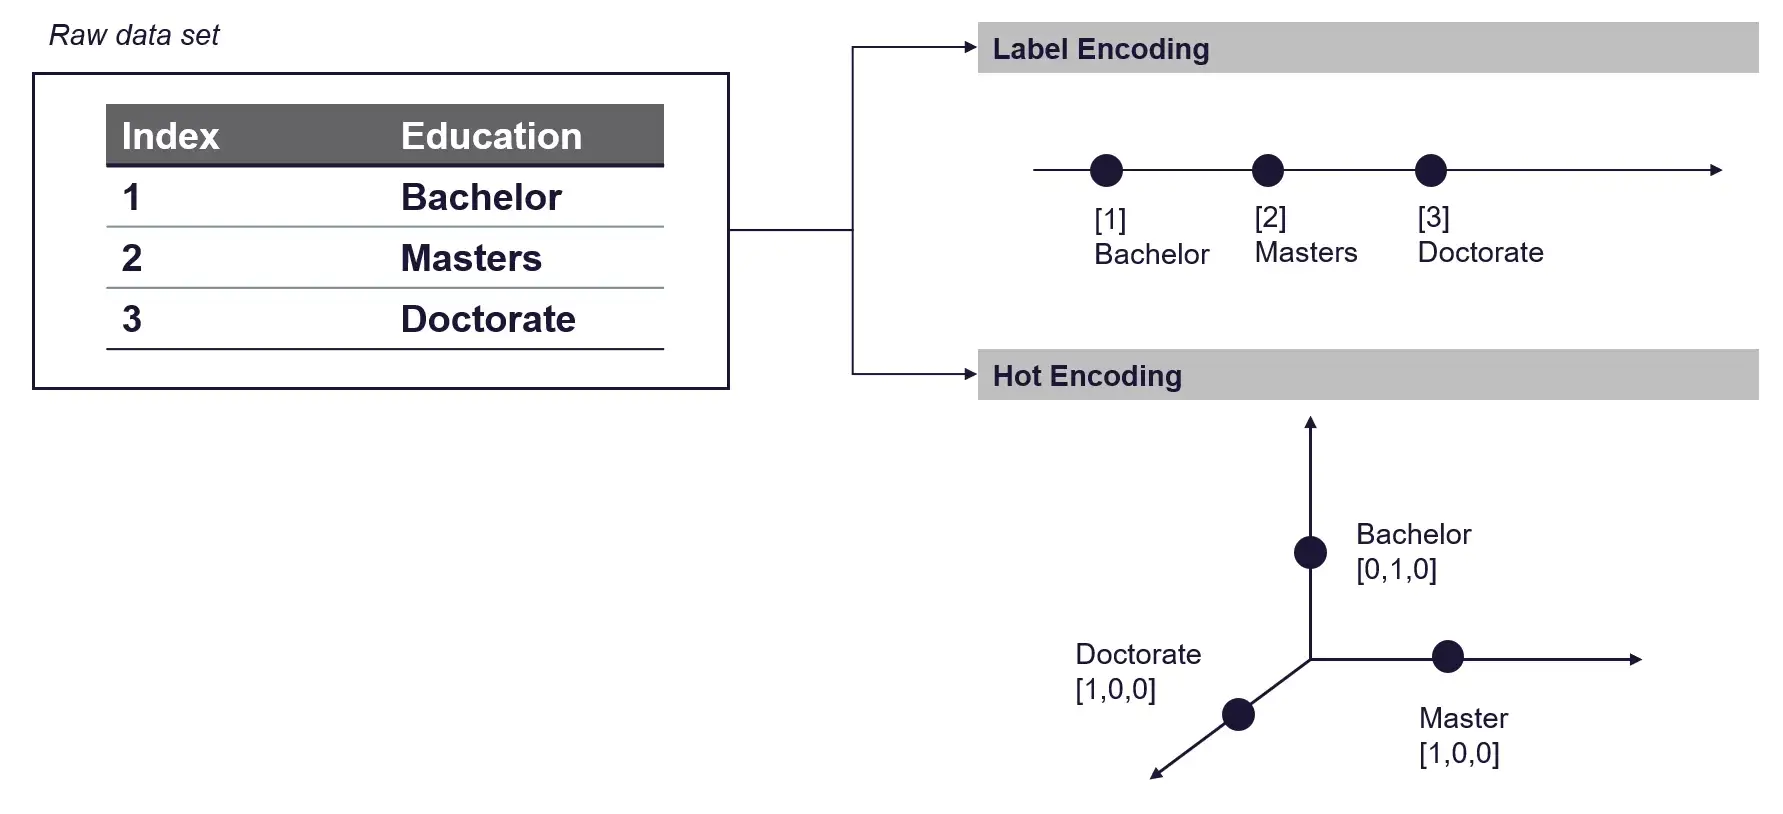
    
</div>

<center><b>Figure 1 | </b> Example of Encoding Techniques.</center> <br>


---

##### **Label/Ordinal Encoding** <sup>[**[2]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) </sup> <a class='anchor' id='label-ordinal-encoding'></a>

- **Label/Ordinal encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding** <sup>[**[3]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)</sup> <a class='anchor' id='one-hot-encoding'></a>

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

---

##### **Target Encoding**

In [ ]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, 
                          "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, 
                          "7. PTD": 7, "8. DEATH": 8}

# Encode the target variable
y_train_encoded = y_train.map(claim_injury_type_dict)
y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

In [68]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

In [69]:
# Check the 'object' columns of the training set (X_train)
X_train.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

In [26]:
## for more details check:
# ?OrdinalEncoder

In [27]:
# Columns to be encoded
X_train.select_dtypes(include='object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

In [71]:
################### First Approach: Label Encoding ###################
# Label/Ordinal Encoding

# Create a new dataframe to store the encoded columns
X_train_ordinal_encoded = X_train.copy()
X_val_ordinal_encoded = X_val.copy()
test_data_ordinal_encoded = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ordinal_encoded = X_train_ordinal_encoded.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ordinal_encoded = X_val_ordinal_encoded.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ordinal_encoded = test_data_ordinal_encoded.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Initialize the OrdinalEncoder (Coder for categorical features)
ordinal_encoder = OrdinalEncoder()   # The number of categories is based on alphabetical order

# Fit the ordinal_encoder on all data (Avoid that some categories are not present in the training data)
ordinal_encoder.fit(pd.concat([X_train_ordinal_encoded, X_val_ordinal_encoded, test_data_ordinal_encoded], axis = 0)[X_train_ordinal_encoded.select_dtypes(include='object').columns])

# Transform the training data [All categorical columns will be transformed into numerical values]
    
# Transform the training data and save it in the same dataframe
X_train_ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.transform(X_train_ordinal_encoded[X_train_ordinal_encoded.select_dtypes(include='object').columns]),      # Transform the data
    columns = X_train_ordinal_encoded.select_dtypes(include='object').columns,                                                # Columns names are the same
    index = X_train_ordinal_encoded.index)                                                                                    # Keep the same index as the original dataframe

X_train_ordinal_encoded = pd.concat([X_train_ordinal_encoded.drop(columns = X_train_ordinal_encoded.select_dtypes(include='object').columns), X_train_ordinal_encoded_df], axis = 1)

# Transform the validation data -> I just 'transform' it because the ordinal_encoder is already fitted on the training data
X_val_ordinal_encoded_df = pd.DataFrame(ordinal_encoder.transform(X_val_ordinal_encoded[X_val_ordinal_encoded.select_dtypes(include='object').columns]), 
                                     columns = X_val_ordinal_encoded.select_dtypes(include='object').columns, index = X_val_ordinal_encoded.index)
X_val_ordinal_encoded = pd.concat([X_val_ordinal_encoded.drop(columns = X_val_ordinal_encoded.select_dtypes(include='object').columns), X_val_ordinal_encoded_df], axis = 1)

# Transform the test data
test_data_ordinal_encoded_df = pd.DataFrame(ordinal_encoder.transform(test_data_ordinal_encoded[test_data_ordinal_encoded.select_dtypes(include='object').columns]),
                                         columns = test_data_ordinal_encoded.select_dtypes(include='object').columns, index = test_data_ordinal_encoded.index)
test_data_ordinal_encoded = pd.concat([test_data_ordinal_encoded.drop(columns = test_data_ordinal_encoded.select_dtypes(include='object').columns), test_data_ordinal_encoded_df], axis = 1)
######################################################################

In [72]:
# Check the label encoded columns
X_train_ordinal_encoded

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                    56.0                     6                1   
5535751                    62.0                     3                0   
5715773                    62.0                     4                1   
5765474                    92.0                     3                0   
6130855                    44.0                     3                1   
...                         ...                   ...              ...   
5614897                    31.0                     3                1   
5994552                    92.0                     0                1   
5659309                    62.0                     5                0   
5744816                    45.0                     1                1   
5635719                    61.0                     6                1   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                   1                 47.0   
5535751                                   0                 52.0   
5715773                                   1                 63.0   
5765474                                   0                 71.0   
6130855                                   1                 28.0   
...                                     ...                  ...   
5614897                                   1                 42.0   
5994552                                   1                 68.0   
5659309                                   0                 51.0   
5744816                                   1                 39.0   
5635719                                   1                 30.0   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                              0               0              2022.0   
5535751                              1               1              2020.0   
5715773                              0               0              2021.0   
5765474                              1               1              2021.0   
6130855                              0               0              2022.0   
...                                ...             ...                 ...   
5614897                              0               0              2020.0   
5994552                              1               0              2022.0   
5659309                              1               1              2021.0   
5744816                              0               0              2021.0   
5635719                              0               0              2021.0   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                           9.0               22.0   
5535751                           8.0                5.0   
5715773                           5.0                3.0   
5765474                           7.0                7.0   
6130855                          11.0                8.0   
...                               ...                ...   
5614897                          11.0               30.0   
5994552                           5.0               12.0   
5659309                           2.0               11.0   
5744816                           6.0                5.0   
5635719                           1.0                6.0   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                             3.0                2022   
5535751                             2.0                2020   
5715773                             0.0                2021   
5765474                             2.0                2021

In [73]:
## for more details check:
# ?OneHotEncoder

In [74]:
################### Second Approach: One-Hot Encoding ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ohe = X_train_ohe.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ohe = X_val_ohe.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ohe = test_data_ohe.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Function to change the name of the columns 
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop="first")                                # drop='first' to fix the dummy variable trap (n-1)

# Fit the ordinal_encoder on all data (Avoid that some categories/classes are not present in the training data)
one_hot_encoder.fit(pd.concat([X_train_ohe, X_val_ohe, test_data_ohe], axis = 0)[X_train_ohe.select_dtypes(include='object').columns])

# Transform all the data [All categorical columns will be transformed into dummy variables]

# Transform the training data
X_train_ohe_values = one_hot_encoder.transform(X_train_ohe[X_train.select_dtypes(include='object').columns])
X_train_ohe_values_df = pd.DataFrame(X_train_ohe_values, 
                                     columns = one_hot_encoder.get_feature_names_out(X_train.select_dtypes(include='object').columns), 
                                     index = X_train_ohe.index)
X_train_ohe = pd.concat([X_train_ohe.drop(columns = X_train_ohe.select_dtypes(include='object').columns), X_train_ohe_values_df], axis = 1)

# Transform the validation data
X_val_ohe_values = one_hot_encoder.transform(X_val_ohe[X_val.select_dtypes(include='object').columns])
X_val_ohe_values_df = pd.DataFrame(X_val_ohe_values, columns = one_hot_encoder.get_feature_names_out(X_val.select_dtypes(include='object').columns), index = X_val_ohe.index)
X_val_ohe = pd.concat([X_val_ohe.drop(columns = X_val_ohe.select_dtypes(include='object').columns), X_val_ohe_values_df], axis = 1)

# Transform the test data
test_data_ohe_values = one_hot_encoder.transform(test_data_ohe[test_data.select_dtypes(include='object').columns])
test_data_ohe_values_df = pd.DataFrame(test_data_ohe_values, columns = one_hot_encoder.get_feature_names_out(test_data.select_dtypes(include='object').columns), index = test_data_ohe.index)
test_data_ohe = pd.concat([test_data_ohe.drop(columns = test_data_ohe.select_dtypes(include='object').columns), test_data_ohe_values_df], axis = 1)

In [75]:
# Check the One-Hot encoded columns
X_train_ohe

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                    56.0                     6                1   
5535751                    62.0                     3                0   
5715773                    62.0                     4                1   
5765474                    92.0                     3                0   
6130855                    44.0                     3                1   
...                         ...                   ...              ...   
5614897                    31.0                     3                1   
5994552                    92.0                     0                1   
5659309                    62.0                     5                0   
5744816                    45.0                     1                1   
5635719                    61.0                     6                1   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                   1                 47.0   
5535751                                   0                 52.0   
5715773                                   1                 63.0   
5765474                                   0                 71.0   
6130855                                   1                 28.0   
...                                     ...                  ...   
5614897                                   1                 42.0   
5994552                                   1                 68.0   
5659309                                   0                 51.0   
5744816                                   1                 39.0   
5635719                                   1                 30.0   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                              0               0              2022.0   
5535751                              1               1              2020.0   
5715773                              0               0              2021.0   
5765474                              1               1              2021.0   
6130855                              0               0              2022.0   
...                                ...             ...                 ...   
5614897                              0               0              2020.0   
5994552                              1               0              2022.0   
5659309                              1               1              2021.0   
5744816                              0               0              2021.0   
5635719                              0               0              2021.0   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                           9.0               22.0   
5535751                           8.0                5.0   
5715773                           5.0                3.0   
5765474                           7.0                7.0   
6130855                          11.0                8.0   
...                               ...                ...   
5614897                          11.0               30.0   
5994552                           5.0               12.0   
5659309                           2.0               11.0   
5744816                           6.0                5.0   
5635719                           1.0                6.0   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                             3.0                2022   
5535751                             2.0                2020   
5715773                             0.0                2021   
5765474                             2.0                2021

> **One-Hot Encoding** cannot be applied to the **`Claim Injury Type`** variable, since that is the target variable. That approach would make the problem **multi-label** and not a **multi-class** problem, which is the case in this project.

> If we were to apply **One-Hot Encoding** to the target variable, we would have to create a separate model for each class, which would make the problem much more complex for the model and would very likely lead to lower performance, or it would require much more data in order to reach the same performance as regular classification.<sup>[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)</sup>

---

#### **4 | Multicollinearity** <a class='anchor' id='4-multicollinearity'></a>


##### **Variance Inflation Factor (VIF)** <sup>[**[4]**](https://www.statisticshowto.com/variance-inflation-factor/)</sup> <a class='anchor' id='variance-inflation-factor-vif'></a> <sup>[**[5]**](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)</sup>

- **VIF** is a measure of multicollinearity among predictor variables within a multiple regression.
- **VIF** estimates how much the variance of a regression coefficient is increased due to multicollinearity in the model.

The formula for **VIF** is:

$$VIF = \frac{1}{1 - R^2}$$

Where $R^2$ is the coefficient of determination in a regression model where the predictor variable is regressed against all other predictor variables.

- **VIF** values are always greater than or equal to $1$.
- If **VIF** is equal to $1$, then there is no correlation among the predictor variables.
- If **VIF** is greater than $1$, then the predictors are correlated with other variables in the model.
- The general rule of thumb is that if **VIF** is greater than $10$, then multicollinearity is high and the predictors are highly correlated.
- In this case, the predictors should be removed from the model.

<br>

> In other words, **Variance Inflation Factor (VIF)** measures how much the variance of a coefficient is inflated due to multicollinearity with other independent variables. The square root of the VIF for a given variable indicates how much larger its standard deviation is compared to a scenario where that variable is not correlated with any other independent variable. If there is no correlation between variables, the VIF values are close to 1.


In [ ]:
### Use VIF to analise multicollinearity

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing (VIF >5)
# In this case, we will consider 'X_train_ordinal_encoded' because in 'X_train_ohe' we have a lot of 'correlated columns'
compute_vif(X_train_ordinal_encoded).sort_values('VIF', ascending=False)

Variable       VIF
12             Assembly Date Month  9.181886
16                  C-2 Date Month  8.705139
17                    C-2 Date Day  3.119764
13               Assembly Date Day  3.115045
20         Attorney/Representative  2.940575
15                   C-2 Date Year  2.698720
6                   IME-4 Reported  2.259347
3        First Hearing Date Binary  2.163088
11              Assembly Date Year  2.160962
8              Accident Date Month  1.975366
2                  C-3 Date Binary  1.960682
7               Accident Date Year  1.626351
5             Weekly Wage Reported  1.619872
18                C-2 Date Weekday  1.574358
14           Assembly Date Weekday  1.571044
22              COVID-19 Indicator  1.429967
28    WCIO Nature of Injury Bucket  1.372824
27     WCIO Cause of Injury Bucket  1.193825
0                    Industry Code  1.190107
29        WCIO Part of Body Bucket  1.159398
26             Carrier Type Bucket  1.133852
25              Medical Fee Region  1.132546
19  Alternative Dispute Resolution  1.126117
23                   District Name  1.055643
21                County of Injury  1.036458
4              Age at Injury Clean  1.030711
24                          Gender  1.026232
10           Accident Date Weekday  1.008604
9                Accident Date Day  1.003814
1             Number of Dependents  1.000083

- **Assembly Date Month** and **C-2 Date Month** show high VIF values ($9.18$ and $8.70$, respectively), suggesting significant multicollinearity. These features are likely correlated with other date-related variables.
- Moderate VIF values are observed for features like **C-2 Date Day** and **Assembly Date Day**, both near $3$, which implies some level of multicollinearity, though not severe.
- Other features, such as **Attorney/Representative** ($VIF \approx2.94$) and **IME-4 Reported** ($VIF \approx 2.26$), exhibit low to moderate multicollinearity, which may still be acceptable depending on model sensitivity.
- Many features, especially categorical ones (e.g., **WCIO Nature of Injury Bucket**, **Gender**, and **COVID-19 Indicator**), have VIF values close to $1$, indicating minimal multicollinearity.

In [5]:
# See results without 'Assembly Date Month'
compute_vif(X_train_ordinal_encoded.drop(columns = 'Assembly Date Month')).sort_values('VIF', ascending=False)

Variable       VIF
16                    C-2 Date Day  3.118962
12               Assembly Date Day  3.113836
19         Attorney/Representative  2.939839
14                   C-2 Date Year  2.661429
6                   IME-4 Reported  2.259114
3        First Hearing Date Binary  2.163073
11              Assembly Date Year  2.133589
2                  C-3 Date Binary  1.960378
15                  C-2 Date Month  1.861249
8              Accident Date Month  1.856946
7               Accident Date Year  1.626345
5             Weekly Wage Reported  1.619826
17                C-2 Date Weekday  1.573581
13           Assembly Date Weekday  1.570382
21              COVID-19 Indicator  1.429401
27    WCIO Nature of Injury Bucket  1.372771
26     WCIO Cause of Injury Bucket  1.193815
0                    Industry Code  1.190079
28        WCIO Part of Body Bucket  1.159174
25             Carrier Type Bucket  1.133841
24              Medical Fee Region  1.132538
18  Alternative Dispute Resolution  1.126079
22                   District Name  1.055631
20                County of Injury  1.036458
4              Age at Injury Clean  1.030686
23                          Gender  1.026227
10           Accident Date Weekday  1.008586
9                Accident Date Day  1.003791
1             Number of Dependents  1.000080

---

In [ ]:
# To avoid run the code above, we can save the training, validation and test data after feature engineering 
# Save the data
X_train.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet', engine = 'fastparquet')
X_val.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet', engine = 'fastparquet')
test_data.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet', engine = 'fastparquet')

# Save the target variable (Series cannot be saved in parquet format - Convert to DataFrame)
y_train.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet', engine = 'fastparquet')
y_val.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet', engine = 'fastparquet')

# Save the target variable encoded
y_train_encoded.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet', engine = 'fastparquet')
y_val_encoded.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet', engine = 'fastparquet')

# Save the Ordinal encoded data
X_train_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet', engine = 'fastparquet')
X_val_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet', engine = 'fastparquet')
test_data_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet', engine = 'fastparquet')

# Save the One-Hot encoded data
X_train_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet', engine = 'fastparquet')
X_val_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet', engine = 'fastparquet')
test_data_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet', engine = 'fastparquet')

---

> For time efficiency, we will use the dataset after the **Feature Engineering** process in **Feature Selection** techniques.

---

## **🎚️ Feature Selection** 

In [2]:
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet').squeeze()

# Load the target variable encoded
y_train_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet').squeeze()   # .squeeze() to convert to Series
y_val_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet').squeeze()

# Load the Ordinal encoded data
X_train_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet')
X_val_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet')
test_data_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet')

# Load the One-Hot encoded data
X_train_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet')
X_val_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet')
test_data_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet')

# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features
print(X_train.shape, X_val.shape, test_data.shape)
print(X_train_ordinal_encoded.shape, X_val_ordinal_encoded.shape, test_data_ordinal_encoded.shape)
print(X_train_ohe.shape, X_val_ohe.shape, test_data_ohe.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)
print('',y_train_encoded.shape, y_val_encoded.shape)

(430519, 30) (143507, 30) (387975, 30)
(430519, 30) (143507, 30) (387975, 30)
(430519, 123) (143507, 123) (387975, 123)

 (430519,) (143507,)
 (430519,) (143507,)


### **Filter Methods**

<div style="max-width:750px; display: block; margin: 0 auto;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png">
</div>

<br>

- Correlation coefficient   ✅
- Chi-Square Test ✅ (with ETA Squared)

> On previous notebook, we have already done the **Filter Methods**, but we will do it again to check if the **Feature Engineering** process has changed the results.

##### **Correlation Coefficient**

In [7]:
# Spearman correlation matrix
cor_spearman = pd.concat([X_train_ordinal_encoded, y_train_encoded], axis=1).corr(method='spearman')
cor_spearman = cor_spearman.round(2)
cor_spearman

Industry Code  Number of Dependents  \
Industry Code                            1.00                  -0.0   
Number of Dependents                    -0.00                   1.0   
C-3 Date Binary                         -0.02                   0.0   
First Hearing Date Binary                0.02                  -0.0   
Age at Injury Clean                     -0.01                   0.0   
Weekly Wage Reported                     0.04                   0.0   
IME-4 Reported                           0.01                   0.0   
Accident Date Year                       0.00                   0.0   
Accident Date Month                     -0.01                  -0.0   
Accident Date Day                        0.00                  -0.0   
Accident Date Weekday                    0.04                   0.0   
Assembly Date Year                      -0.00                   0.0   
Assembly Date Month                     -0.02                  -0.0   
Assembly Date Day                       -0.00                  -0.0   
Assembly Date Weekday                    0.00                  -0.0   
C-2 Date Year                            0.01                   0.0   
C-2 Date Month                          -0.02                  -0.0   
C-2 Date Day                             0.00                   0.0   
C-2 Date Weekday                         0.00                  -0.0   
Alternative Dispute Resolution          -0.11                  -0.0   
Attorney/Representative                  0.02                  -0.0   
County of Injury                        -0.01                   0.0   
COVID-19 Indicator                       0.09                  -0.0   
District Name                           -0.01                   0.0   
Gender                                  -0.16                  -0.0   
Medical Fee Region                       0.01                  -0.0   
Carrier Type Bucket                      0.29                  -0.0   
WCIO Cause of Injury Bucket              0.04                   0.0   
WCIO Nature of Injury Bucket             0.14                  -0.0   
WCIO Part of Body Bucket                 0.11                   0.0   
Claim Injury Type                        0.06                  -0.0   

                                C-3 Date Binary  First Hearing Date Binary  \
Industry Code                             -0.02                       0.02   
Number of Dependents                       0.00                      -0.00   
C-3 Date Binary                            1.00                       0.51   
First Hearing Date Binary                  0.51                       1.00   
Age at Injury Clean                       -0.11                      -0.12   
Weekly Wage Reported                      -0.41                      -0.51   
IME-4 Reported                            -0.49                      -0.65   
Accident Date Year                         0.06                       0.06   
Accident Date Month                        0.01                       0.01   
Accident Date Day                         -0.00                      -0.00   
Accident Date Weekday                     -0.00                      -0.00   
Assembly Date Year                         0.05                       0.06   
Assembly Date Month                        0.01                       0.01   
Assembly Date Day                          0.01                       0.00   
Assembly Date Weekday                     -0.01                      -0.01   
C-2 Date Year                              0.02                       0.03   
C-2 Date Month                             0.02                       0.01   
C-2 Date Day                               0.00                       0.00   
C-2 Date Weekday                          -0.02                      -0.02   
Alternative Dispute Resolution             0.03                       0.04   
Attorney/Representative                   -0.69                      -0.66   
County of Injury                          -

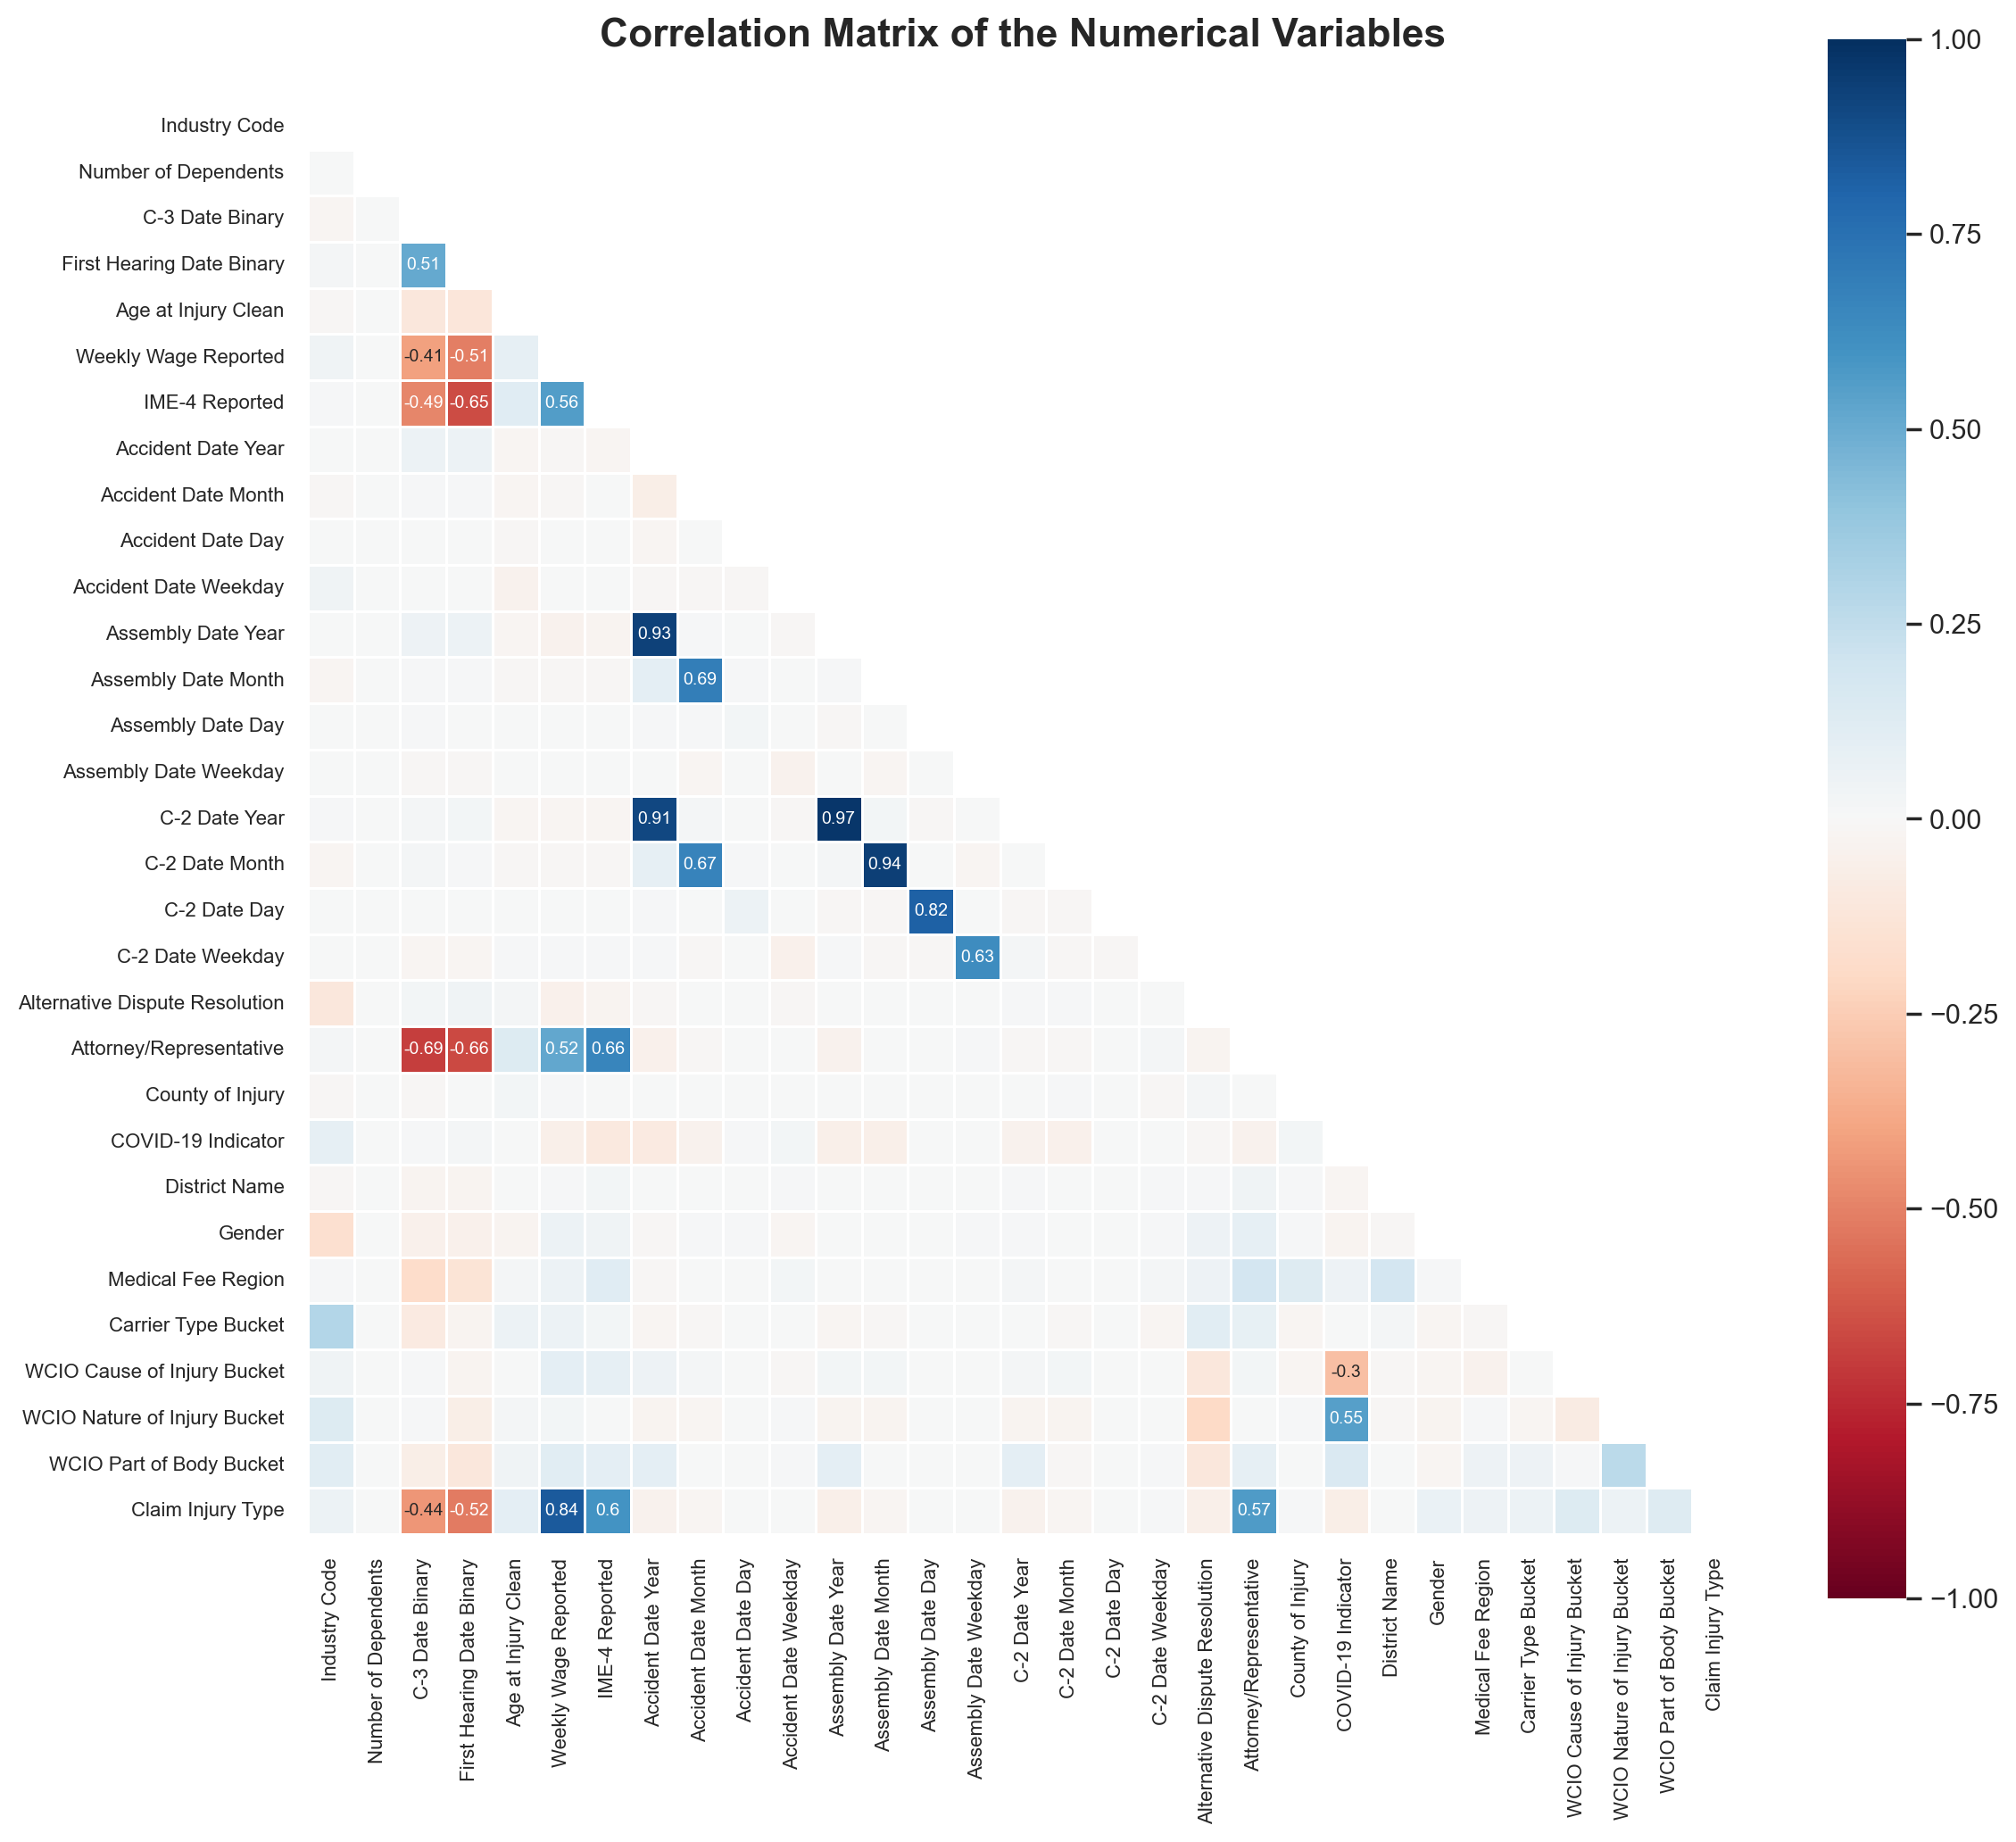

In [8]:
# ---------------------- Spearman Correlation [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(cor_spearman.values) >= 0.3
annot = np.where(mask_annot, cor_spearman.values, np.full(cor_spearman.shape,""))

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor_spearman, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# # Create a custom diverging palette from red (-1) to white (0) to green (1)
# cmap = sns.diverging_palette(10, 130, s=100, l=50, n=9, center='light', as_cmap=True)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(12, 12))
sns.heatmap(cor_spearman,
            mask=mask,      # Hide the upper triangle
            cmap='RdBu',    # Colot Palette
            annot=annot,    # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':7}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('Correlation Matrix of the Numerical Variables\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Spearman_Correlation_Matrix_Numerical_AfterFeatureEngineering.png', dpi=300)
plt.show()

##### **Chi-Square Test** <sup>[**[6]**](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)</sup> <a class='anchor' id='chi-square-test'></a>

In [38]:
def TestIndependence(X,y,var,alpha=0.05):        
    """
    Test the independence of a categorical variable with respect to the target variable using the Chi-Square test.

    Parameters:
    X (pd.Series): The categorical variable to be tested.
    y (pd.Series): The target variable.
    var (str): The name of the variable being tested.
    alpha (float, optional): The significance level to determine if the variable is important. Default is 0.05.

    Returns:
    None: Prints whether the variable is important for prediction or not based on the Chi-Square test.
    """
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [39]:
# Apply the TestIndependence function to all categorical variables
X_train_cat_cols = X_train.select_dtypes(include='object').columns
for var in X_train_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_train_ordinal_encoded[var], y_train, var, alpha=0.05)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Carrier Type Bucket is IMPORTANT for Prediction
WCIO Cause of Injury Bucket is IMPORTANT for Prediction
WCIO Nature of Injury Bucket is IMPORTANT for Prediction
WCIO Part of Body Bucket is IMPORTANT for Prediction


In [40]:
# Apply the TestIndependence function to validate to compare the results
for var in X_val_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_val_ordinal_encoded[var], y_val, var, alpha=0.05)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Carrier Type Bucket is IMPORTANT for Prediction
WCIO Cause of Injury Bucket is IMPORTANT for Prediction
WCIO Nature of Injury Bucket is IMPORTANT for Prediction
WCIO Part of Body Bucket is IMPORTANT for Prediction


### **Wrapper Methods**

##### **Recursive Feature Elimination (RFE)** <sup>[**[7]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)</sup> <a class='anchor' id='rfe'></a>

In [4]:
# Apply MinMaxScaler to the training, validation and test data [Just for cases where RFE model is appropriate]
# We will apply the MinMaxScaler to numerical and categorical variables
# Source: https://stats.stackexchange.com/questions/266359/do-we-ever-normalize-categorical-variables-does-it-make-any-sense
#         https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization

# We choose MinMaxScaler because it preserves the binary nature of the data
minmax_scaler = MinMaxScaler().fit(X_train_ordinal_encoded)
X_train_ordinal_enc_norm = pd.DataFrame(minmax_scaler.transform(X_train_ordinal_encoded), 
                                        columns = X_train_ordinal_encoded.columns, 
                                        index = X_train_ordinal_encoded.index)
X_validation_ordinal_enc_norm = pd.DataFrame(minmax_scaler.transform(X_val_ordinal_encoded), 
                                            columns = X_val_ordinal_encoded.columns, 
                                            index = X_val_ordinal_encoded.index)

X_test_ordinal_enc_norm = pd.DataFrame(minmax_scaler.transform(test_data_ordinal_encoded), 
                                       columns = test_data_ordinal_encoded.columns, 
                                       index = test_data_ordinal_encoded.index)

################ [EXTRA: We can try Feature Selection with other types of scalers] #################
# Apply StandardScaler to the training, validation and test data
standard_scaler = StandardScaler().fit(X_train_ordinal_encoded)
X_train_ordinal_enc_stand = pd.DataFrame(standard_scaler.transform(X_train_ordinal_encoded),
                                        columns = X_train_ordinal_encoded.columns,
                                        index = X_train_ordinal_encoded.index)
X_validation_ordinal_enc_stand = pd.DataFrame(standard_scaler.transform(X_val_ordinal_encoded),
                                              columns = X_val_ordinal_encoded.columns,
                                              index = X_val_ordinal_encoded.index)
X_test_ordinal_enc_stand = pd.DataFrame(standard_scaler.transform(test_data_ordinal_encoded),
                                        columns = test_data_ordinal_encoded.columns,
                                        index = test_data_ordinal_encoded.index)

# Apply LogScaler to the training, validation and test data
# Log Transformation - Logarithm of the values in the dataset (Base 10)
# Since log(0) is undefined, we will apply the log in the dataset where the values are greater than 0 and replace the NaN values with 0
X_train_ord_enc_log = X_train_ordinal_encoded.where(X_train_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)
X_val_ord_enc_log = X_val_ordinal_encoded.where(X_val_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)
test_data_ord_enc_log = test_data_ordinal_encoded.where(test_data_ordinal_encoded > 0).apply(np.log).replace(np.nan, 0)
######################################################################################################


In [5]:
# Check the first rows of the norm training set
# X_train_ordinal_enc_norm.head(2)
# X_train_ordinal_enc_stand.head(2)
X_train_ord_enc_log.head(2)

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                4.025352              1.791759              0.0   
5535751                4.127134              1.098612              0.0   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                 0.0             3.850148   
5535751                                 0.0             3.951244   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                            0.0             0.0            7.611842   
5535751                            0.0             0.0            7.610853   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                      2.197225           3.091042   
5535751                      2.079442           1.609438   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                        1.098612            7.611842   
5535751                        0.693147            7.610853   

                  Assembly Date Month  Assembly Date Day  \
Claim Identifier                                           
6094685                      2.197225           3.295837   
5535751                      2.079442           2.564949   

                  Assembly Date Weekday  C-2 Date Year  C-2 Date Month  \
Claim Identifier                                                         
6094685                        0.000000       7.611842        2.197225   
5535751                        1.098612       7.610853        2.079442   

                  C-2 Date Day  C-2 Date Weekday  \
Claim Identifier                                   
6094685               3.295837               0.0   
5535751               2.833213               0.0   

                  Alternative Dispute Resolution  Attorney/Representative  \
Claim Identifier                                                            
6094685                                      0.0                      0.0   
5535751                                      0.0                      0.0   

                  County of Injury  COVID-19 Indicator  District Name  Gender  \
Claim Identifier                                                                
6094685                   1.791759                 0.0       0.693147     0.0   
5535751                   3.135494                 0.0       1.386294     0.0   

                  Medical Fee Region  Carrier Type Bucket  \
Claim Identifier                                            
6094685                     0.000000                  0.0   
5535751                     1.098612                  0.0   

                  WCIO Cause of Injury Bucket  WCIO Nature of Injury Bucket  \
Claim Identifier                                                              
6094685                              1.609438                           0.0   
5535751                              2.197225                           0.0   

                  WCIO Part of Body Bucket  
Claim Identifier                            
6094685                           1.609438  
5535751                           0.693147

In [6]:
print('Min:', X_train_ordinal_enc_norm.min().min(), 'Max:', X_train_ordinal_enc_norm.max().max())
print('Min:', X_validation_ordinal_enc_norm.min().min(), 'Max:', X_validation_ordinal_enc_norm.max().max())
print('Min:', X_test_ordinal_enc_norm.min().min(), 'Max:', X_test_ordinal_enc_norm.max().max())               
# It's normal to have values greater than 1 because we have new categories in the test set that were not present in the training set

Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: -0.3928571428571388 Max: 2.0


In [7]:
# Since OHE make categorical variables binary [0,1], we can apply the MinMaxScaler to the One-Hot encoded data
minmax_scaler = MinMaxScaler().fit(X_train_ohe)
X_train_ohe_norm = pd.DataFrame(minmax_scaler.transform(X_train_ohe),
                                columns = X_train_ohe.columns,
                                index = X_train_ohe.index)
X_validation_ohe_norm = pd.DataFrame(minmax_scaler.transform(X_val_ohe),
                                    columns = X_val_ohe.columns,
                                    index = X_val_ohe.index)
X_test_ohe_norm = pd.DataFrame(minmax_scaler.transform(test_data_ohe),
                               columns = test_data_ohe.columns,
                               index = test_data_ohe.index)

# Check the first rows of the norm training set
X_train_ohe_norm.head(2)

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                0.608696                   1.0              1.0   
5535751                0.673913                   0.5              0.0   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                 1.0             0.380165   
5535751                                 0.0             0.421488   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                            0.0             0.0            0.983871   
5535751                            1.0             1.0            0.951613   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                      0.727273           0.700000   
5535751                      0.636364           0.133333   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                        0.500000                 1.0   
5535751                        0.333333                 0.0   

                  Assembly Date Month  Assembly Date Day  \
Claim Identifier                                           
6094685                      0.727273           0.866667   
5535751                      0.636364           0.400000   

                  Assembly Date Weekday  C-2 Date Year  C-2 Date Month  \
Claim Identifier                                                         
6094685                        0.166667       0.928571        0.727273   
5535751                        0.500000       0.857143        0.636364   

                  C-2 Date Day  C-2 Date Weekday  \
Claim Identifier                                   
6094685               0.866667          0.166667   
5535751               0.533333          0.000000   

                  Alternative Dispute Resolution_U  \
Claim Identifier                                     
6094685                                        0.0   
5535751                                        0.0   

                  Alternative Dispute Resolution_Y  Attorney/Representative_Y  \
Claim Identifier                                                                
6094685                                        0.0                        0.0   
5535751                                        0.0                        1.0   

                  County of Injury_ALLEGANY  County of Injury_BRONX  \
Claim Identifier                                                      
6094685                                 0.0                     0.0   
5535751                                 0.0                     0.0   

                  County of Injury_BROOME  County of Injury_CATTARAUGUS  \
Claim Identifier                                                          
6094685                               0.0                           0.0   
5535751                               0.0                           0.0   

                  County of Injury_CAYUGA  County of Injury_CHAUTAUQUA  \
Claim Identifier                                                         
6094685                               0.0                          1.0   
5535751                               0.0                          0.0   

                  County of Injury_CHEMUNG  County of Injury_CHENANGO  \
Claim Identifier                                                        
6094685                                0.0                        0.0   
5535751                                0.0                        0.0   

                  County of Injury_CLINTON  County of Injury_COLUMBIA  \
Claim Identifier                                                        
6094685                       

> Since ***Kaggle's benchmark*** is **`F1-Score (Macro)`**, we will use this method to select the most important variables for the model in **RFE (Recursive Feature Elimination)**.

In [8]:
# -------------------------------------- MinMax RFE --------------------------------------
# No of features
nof_list = np.arange(1, len(X_train_ord_enc_log.columns) + 1)    # No of features (all aranged from 1 to n_features)          
                                                                 #### Change to enc_stand or enc_log if you want to test with other scalers

high_score = 0                                                   # Variable to store the highest score 

# Variable to store the optimum features
nof = 0
train_score_list = []
val_score_list = []

# Loop to select the best no of features [RFE]
for n in tqdm(range(len(nof_list))):

    # Model to test - For our 1st approach - [Logistic Regression, Naive Bayes (Categorical + Gaussian) , KNN (Brute + KDTree + BallTree)]
    # Logistic Regression - Can be used 
    # Naive Bayes - CategoricalNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # Naive Bayes - GaussianNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # KNN - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # Source: https://stackoverflow.com/questions/59342197/models-to-use-for-recursive-feature-elimination-for-classification-and-regressio

    # Model to test - For our 2nd approach - [Logistic Regression, Decision Tree, Random Forest, Gradient Boosting]
    # Although we haven't yet learned these algorithms, so we will not use them for now (as requested in the homework/project guidelines)
    # If you want to use them, you can uncomment the lines below
    # model = DecisionTreeClassifier()
    # model = RandomForestClassifier()
    # model = GradientBoostingClassifier()    

    # Model to test - [Logistic Regression]
    # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    model = LogisticRegression(max_iter=100,              # Maximum number of iterations taken for the solvers to converge (default=100)
                               solver='lbfgs',            # Algorithm to use in the optimization problem (default='lbfgs' - can handle multiclasses)
                               random_state=2024)         # Seed for the random number generator (for reproducibility purposes)

    # RFE 
    rfe = RFE(estimator = model,
              n_features_to_select = nof_list[n])

    # Fit the model
    X_train_rfe = rfe.fit_transform(X_train_ord_enc_log,y_train)                     ### Change to enc_stand or enc_log if you want to test with other scalers
    X_val_rfe = rfe.transform(X_val_ord_enc_log)                                     ### Change to enc_stand or enc_log if you want to test with other scalers
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data - We will choose the best score based on F1-Score       
    pred_train = model.predict(X_train_rfe)
    train_score = metrics.f1_score(y_train, pred_train, average='macro')
    train_score_list.append(train_score)
    
    # Storing results on training data
    pred_val = model.predict(X_val_rfe)
    val_score = metrics.f1_score(y_val, pred_val, average='macro')
    val_score_list.append(val_score)
    
    # Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

        # Features to select (adding mention of variables to keep)
        features_to_select = pd.Series(rfe.support_, index = X_train_ord_enc_log.columns)    ### Change to enc_stand or enc_log if you want to test with other scalers

## Time of Execution RFE: Xh Xmin Xs

100%|██████████| 30/30 [1:28:58<00:00, 177.94s/it]


In [9]:
# Print the optimum number of features and the score with that number of features
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("\nFeatures to select:")

# Show the features to select
results_rfe = features_to_select.to_frame()
results_rfe.index.name = 'Feature'
results_rfe.columns = ['Selected']
results_rfe.sort_index(inplace=True)
results_rfe

Optimum number of features: 23
Score with 23 features: 0.123131

Features to select:


Selected
Feature                                 
Accident Date Day                   True
Accident Date Month                 True
Accident Date Weekday               True
Accident Date Year                  True
Age at Injury Clean                 True
Alternative Dispute Resolution      True
Assembly Date Day                   True
Assembly Date Month                 True
Assembly Date Weekday               True
Assembly Date Year                  True
Attorney/Representative            False
C-2 Date Day                        True
C-2 Date Month                      True
C-2 Date Weekday                    True
C-2 Date Year                       True
C-3 Date Binary                    False
COVID-19 Indicator                 False
Carrier Type Bucket                 True
County of Injury                    True
District Name                       True
First Hearing Date Binary          False
Gender                              True
IME-4 Reported                     False
Industry Code                       True
Medical Fee Region                  True
Number of Dependents               False
WCIO Cause of Injury Bucket         True
WCIO Nature of Injury Bucket        True
WCIO Part of Body Bucket            True
Weekly Wage Reported               False

In [10]:
# Save the results of the RFE - Excel file with Model's name
results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_LogisticRegression_Log.xlsx')     ### Change file name

> For compare different models/scaler methods, we will use **RFE** to select the best features for each model and put the results in a **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

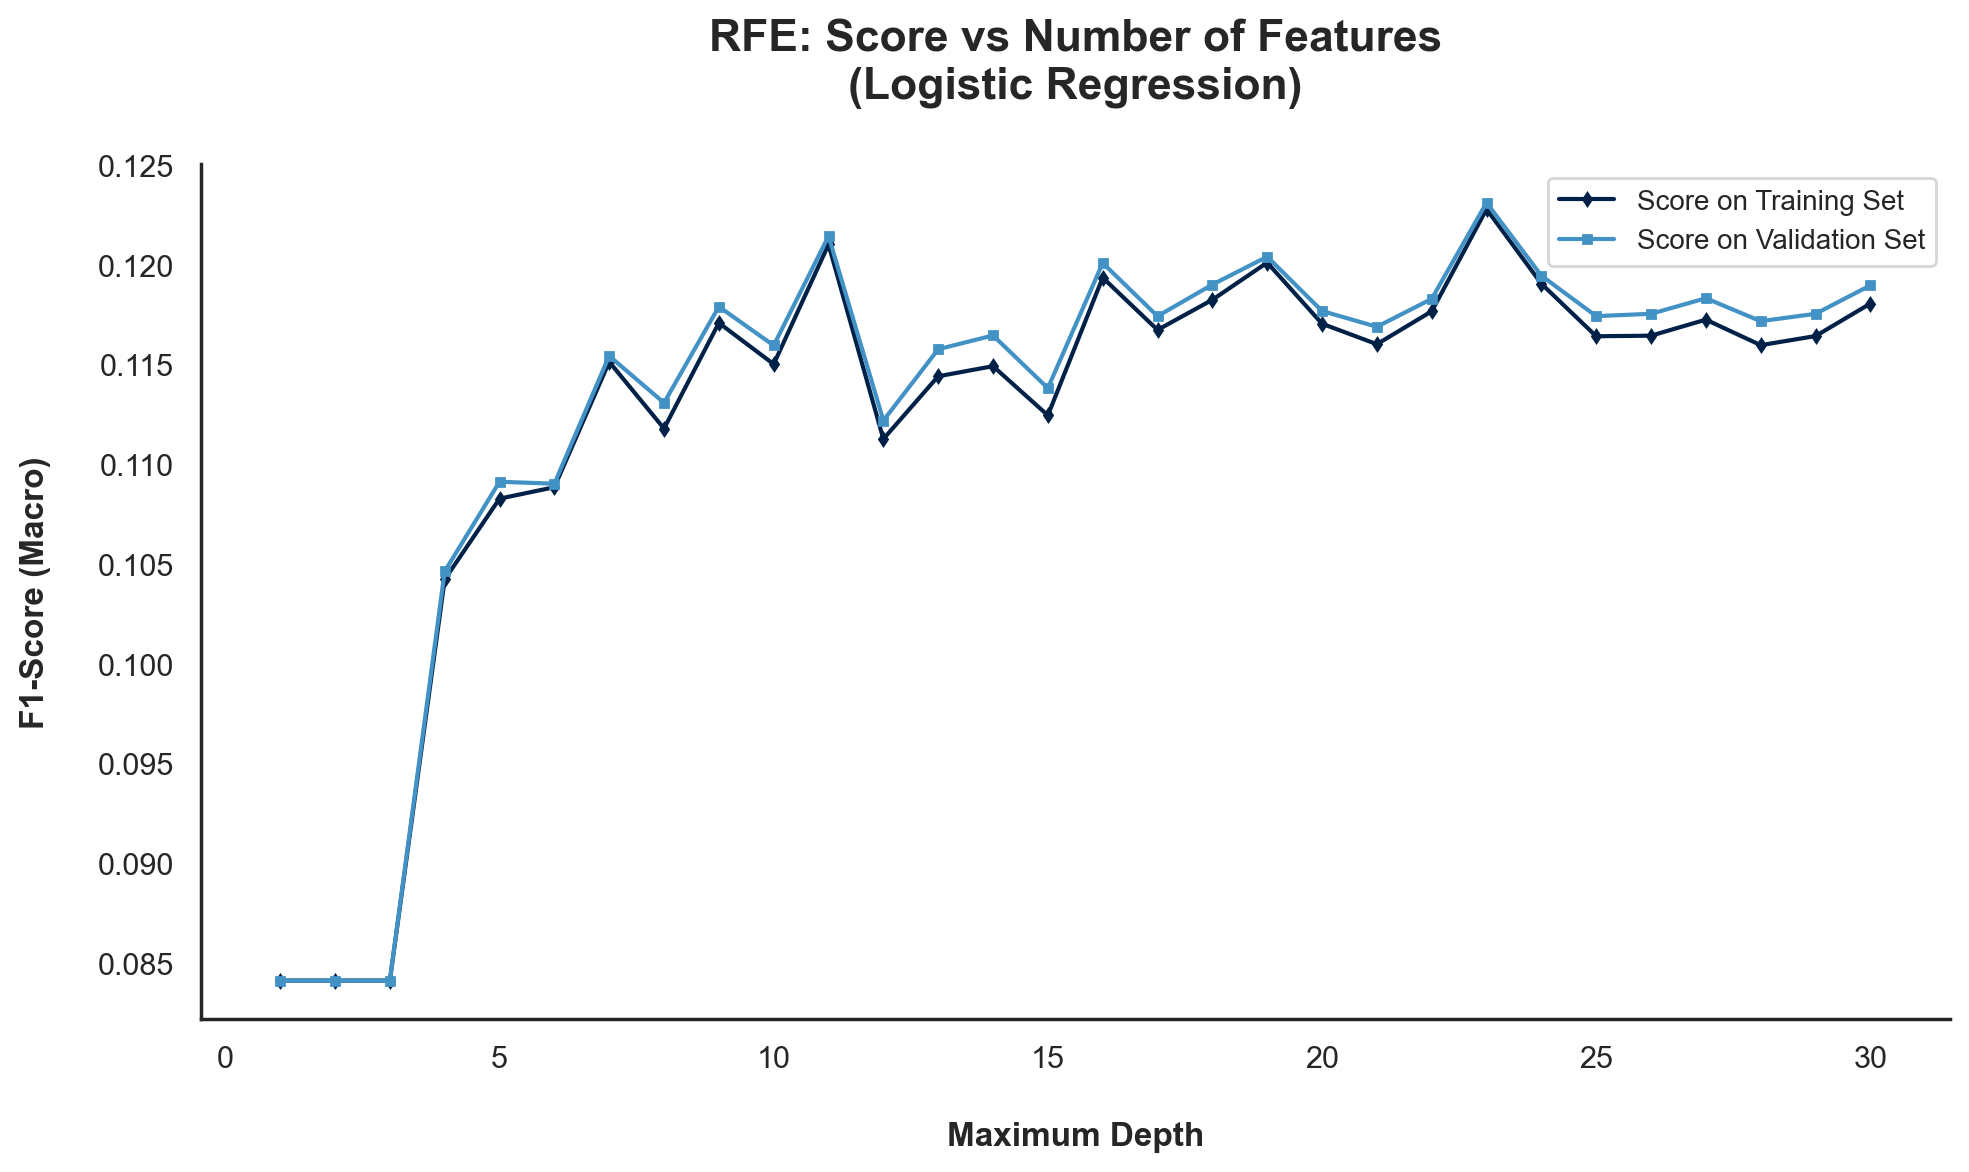

In [11]:
# Plot the results of the RFE
fig = plt.figure(figsize=(10,6))
plt.plot(list(range(1,len(X_train_ordinal_enc_norm.columns) + 1)), train_score_list, label="Score on Training Set", color='#002147', marker='d', markersize=3)
plt.plot(list(range(1,len(X_train_ordinal_enc_norm.columns) + 1)), val_score_list, label="Score on Validation Set", color='#4292C6', marker='s', markersize=3)

# Customizing the plot
plt.title("RFE: Score vs Number of Features\n(Logistic Regression)\n", fontsize=16, fontweight='bold')
plt.xlabel("\nMaximum Depth", fontsize=12, fontweight='bold')
plt.ylabel("F1-Score (Macro)\n", fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=10, frameon=True)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features_LogisticRegression_Log_8.11.2024.png', 
            dpi=300, bbox_inches='tight') ############# Change file name
plt.show()

---

### **Embedded Methods** <sup>[**[8]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)</sup>  <sup>[**[9]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</sup> <a class='anchor' id='embedded-methods'></a>
<a class='anchor' id='embedded-methods'></a>

#### **Ridge Regression** (L2 Regularization) <sup>[**[10]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)</sup> <a class='anchor' id='ridge-regression-l2-regularization'></a>

<br>

$$\text{Ridge Regression} = \text{Linear Regression} + \text{L2 Regularization}$$

<br> **Cost Function for Ridge Regression:**

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$

The Ridge Regression is a linear regression model that uses the L2 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L2 regularization adds a penalty equal to the square of the magnitude of the coefficients.

The objective of the Ridge Regression is to minimize the cost function $\text{sum of squared residuals}$ plus the **L2 regularization term** ($\lambda \times \text{the \; slope}^2$).

Where $\lambda$ is the regularization parameter.
- $\lambda$ can range from 0 to positive infinity
- $\lambda=0$ then Ridge regression is same as Least Squares
- Increasing $\lambda$ will promote a smaller slope (asymptotically to zero)
- How to choose $\lambda$
  - CV to determine the lowest variance
- Ridge Regression can solve for parameters when there is not enough data samples

<br><br>

---

#### **Lasso Regression** (Least Absolute Shrinkage and Selection operator) <sup>[**[11]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)</sup> <a class='anchor' id='lasso-regression-least-absolute-shrinkage-and-selection-operator'></a>

<br>

$$\text{Lasso Regression} = \text{Linear Regression} + \text{L1 Regularization}$$

<br> Cost Function for LASSO Regression:

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

The Lasso Regression is a linear regression model that uses the L1 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients.

- Difference is instead of taking the square of the coefficients, magnitudes are taken into account.
- This type of regularization (**L1**) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output

<br>

---

In [18]:
#################################################### Embedded Methods ####################################################
## 1. Lasso Regularization - compare simple logistic regressions
## 2. Ridge Regularization - compare simple logistic regressions

# ---------------------------------------------- Ordinal Encoding ----------------------------------------------
# Assign the features to the X and y variables for the Lasso and Ridge Regularization
X = X_train_ordinal_enc_stand.values
y = y_train_encoded.values

# Feature names
feature_names = X_train_ordinal_enc_stand.columns

# Lasso Regularization
lasso_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                            penalty="l1",                      # Lasso
                                                                            solver='saga'),                    # Algorithm to use in the optimization problem
                                                                                                               # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
                                                                            max_features=len(feature_names),   # Maximum number of features to select
                                                                            threshold="1.25*mean").fit(X,y)    # Threshold for feature selection (need to transform the coef_ values)

lasso_selected_features = feature_names[lasso_selector.get_support()]

# Assign the features to the X and y variables for the Lasso Regularization
# Source: https://stackoverflow.com/questions/75027483/why-sklearn-selectfrommodel-estimator-coef-return-a-2d-array
#         https://stackoverflow.com/questions/64581307/how-to-properly-do-feature-selection-with-selectfrommodel-from-scikit-learn
lasso_coef = pd.Series(abs(lasso_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
lasso_imp_coef = lasso_coef.sort_values(ascending=True)

# Ridge Regularization
ridge_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                            penalty="l2",                      # Ridge
                                                                            solver='sag',                      # Algorithm to use in the optimization problem
                                                                            max_iter=1000),                    # Ensure convergence
                                                                            max_features=len(feature_names),   # Maximum number of features to select
                                                                            threshold="1.25*mean").fit(X, y)   # Threshold (need to transform the coef_ values)

ridge_selected_features = feature_names[ridge_selector.get_support()]

# Assign the coefficients to the selected features for the Ridge Regularization
ridge_coef = pd.Series(abs(ridge_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
ridge_import_coef = ridge_coef.sort_values(ascending=True)

## Time of Execution Ridge and Lasso Regularization - Ordinal Encoding = 10m 10.3s

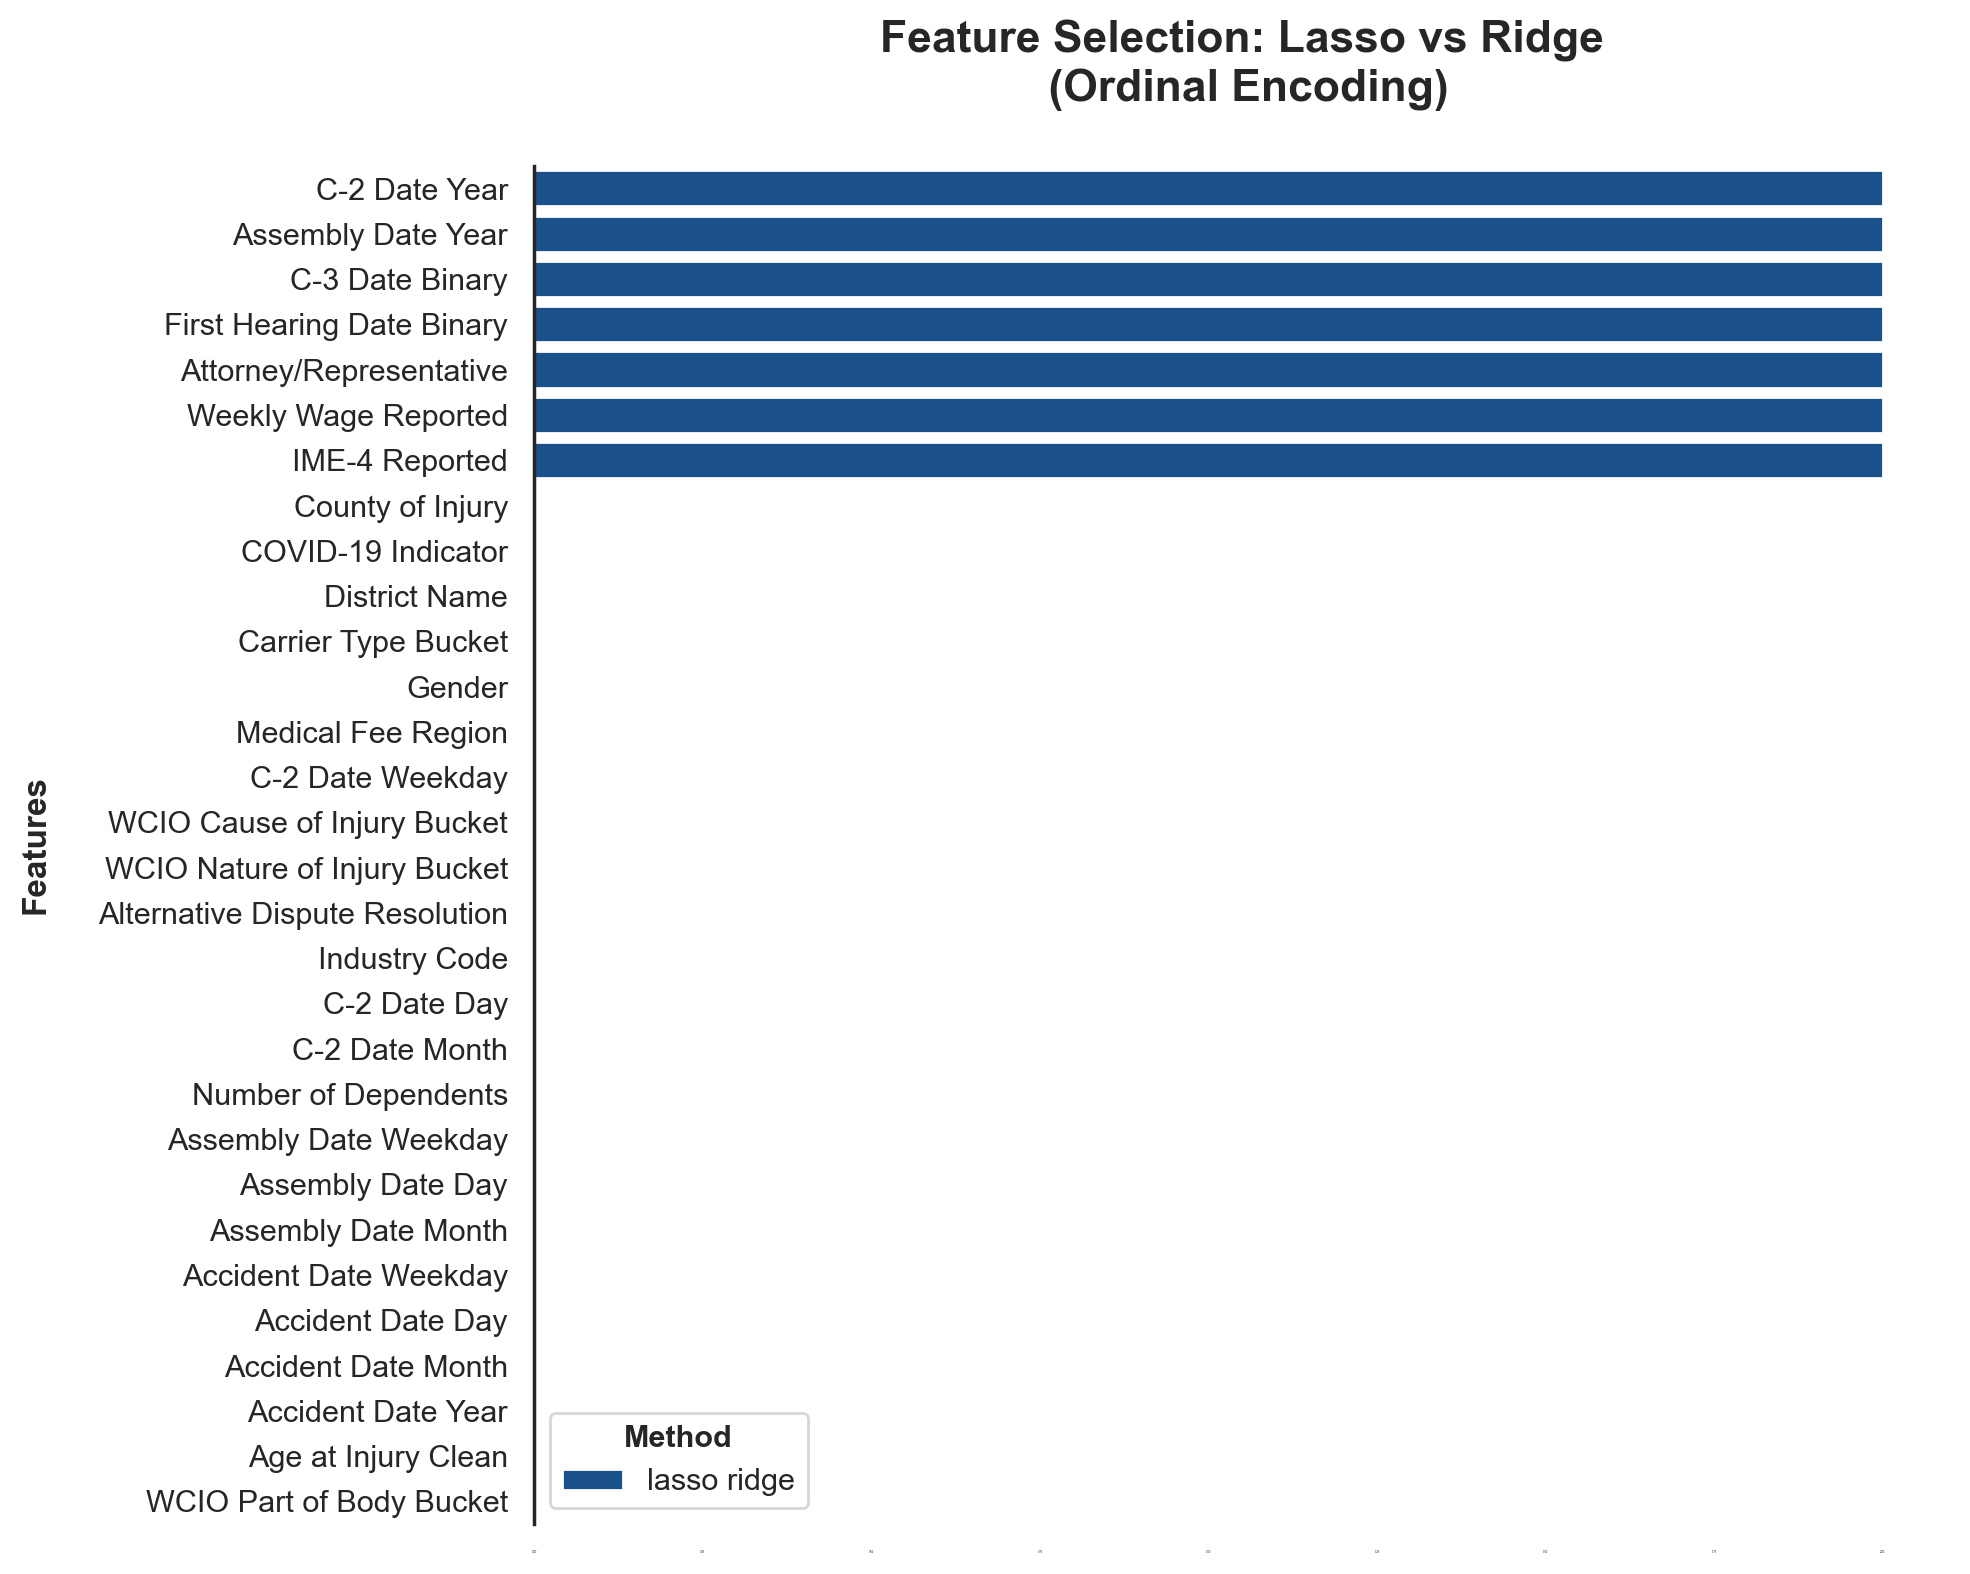

In [19]:

## Plot the results of the Lasso and Ridge Regularization
dtf_features = pd.DataFrame({"features": feature_names})
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)

dtf_features["ridge"] = dtf_features["features"].apply(lambda x: "ridge" if x in ridge_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in ridge_selected_features else 0)

dtf_features["method"] = dtf_features[["lasso", "ridge"]].apply(lambda x: (x[0] + " " + x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]

# plot
plt.figure(figsize=(10, 8))
sns.barplot(y="features", x="selection", hue="method", 
            data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"lasso": "#6BAED6", "ridge": "#3182BD", 'lasso ridge':'#08519C'})

plt.title('Feature Selection: Lasso vs Ridge\n (Ordinal Encoding)\n', fontsize=16, fontweight='bold')
plt.ylabel('Features\n', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()
plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_OrdinalEncoding_StandScaler.png', dpi=300, bbox_inches='tight')
plt.show()

## Normal blue: Lasso
## light blue: Ridge
## Dark blue:  Both Lasso and Ridge

In [20]:
# Dataframe with the abs. coefficients of the Lasso and Ridge Regularization
lasso_ridge_coef = pd.DataFrame({'Lasso': lasso_imp_coef, 'Ridge': ridge_import_coef})
lasso_ridge_coef = lasso_ridge_coef.sort_values(by = ['Lasso', 'Ridge'], ascending = [False, False])

# Save the results of the Lasso and Ridge Regularization - Excel file with Model's name
lasso_ridge_coef.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_LogisticRegression_ScaledData.xlsx')     ### Change file name
lasso_ridge_coef

Lasso     Ridge
Feature                                           
Weekly Wage Reported            1.575413  1.630053
First Hearing Date Binary       0.809913  1.094470
IME-4 Reported                  0.789411  0.859180
Attorney/Representative         0.693691  0.815412
Assembly Date Year              0.536304  0.615220
C-2 Date Year                   0.456287  0.605080
C-3 Date Binary                 0.410670  0.519744
COVID-19 Indicator              0.339408  0.358624
WCIO Cause of Injury Bucket     0.296447  0.317929
Age at Injury Clean             0.270448  0.298767
Medical Fee Region              0.221918  0.228683
Assembly Date Month             0.201969  0.227323
Industry Code                   0.199323  0.201752
Gender                          0.188467  0.215882
WCIO Nature of Injury Bucket    0.169554  0.173637
Alternative Dispute Resolution  0.168694  0.184244
WCIO Part of Body Bucket        0.130371  0.159121
Accident Date Year              0.127697  0.142420
C-2 Date Month                  0.117506  0.179486
District Name                   0.077586  0.088096
Accident Date Day               0.056609  0.086076
Accident Date Weekday           0.054099  0.059997
County of Injury                0.049535  0.053691
Carrier Type Bucket             0.040670  0.049498
C-2 Date Day                    0.037142  0.039837
Accident Date Month             0.034987  0.039267
C-2 Date Weekday                0.030015  0.035880
Number of Dependents            0.025616  0.045420
Assembly Date Day               0.025224  0.026409
Assembly Date Weekday           0.017197  0.025704

In [26]:
# Dataframe with the results
dtf_features.set_index('features', inplace=True)
dtf_features.sort_index(ascending=True, inplace=True)

# Save the results of the feature selection on Excel file - Ordinal Encoding
dtf_features.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_LogisticRegression_ScaledData.xlsx')     ### Change file name
dtf_features

lasso  num1  ridge  num2       method  \
features                                                                
Accident Date Day                         0            0                
Accident Date Month                       0            0                
Accident Date Weekday                     0            0                
Accident Date Year                        0            0                
Age at Injury Clean                       0            0                
Alternative Dispute Resolution            0            0                
Assembly Date Day                         0            0                
Assembly Date Month                       0            0                
Assembly Date Weekday                     0            0                
Assembly Date Year              lasso     1  ridge     1  lasso ridge   
Attorney/Representative         lasso     1  ridge     1  lasso ridge   
C-2 Date Day                              0            0                
C-2 Date Month                            0            0                
C-2 Date Weekday                          0            0                
C-2 Date Year                   lasso     1  ridge     1  lasso ridge   
C-3 Date Binary                 lasso     1  ridge     1  lasso ridge   
COVID-19 Indicator                        0            0                
Carrier Type Bucket                       0            0                
County of Injury                          0            0                
District Name                             0            0                
First Hearing Date Binary       lasso     1  ridge     1  lasso ridge   
Gender                                    0            0                
IME-4 Reported                  lasso     1  ridge     1  lasso ridge   
Industry Code                             0            0                
Medical Fee Region                        0            0                
Number of Dependents                      0            0                
WCIO Cause of Injury Bucket               0            0                
WCIO Nature of Injury Bucket              0            0                
WCIO Part of Body Bucket                  0            0                
Weekly Wage Reported            lasso     1  ridge     1  lasso ridge   

                                selection  
features                                   
Accident Date Day                       0  
Accident Date Month                     0  
Accident Date Weekday                   0  
Accident Date Year                      0  
Age at Injury Clean                     0  
Alternative Dispute Resolution          0  
Assembly Date Day                       0  
Assembly Date Month                     0  
Assembly Date Weekday                   0  
Assembly Date Year                      2  
Attorney/Representative                 2  
C-2 Date Day                            0  
C-2 Date Month                          0  
C-2 Date Weekday                        0  
C-2 Date Year                           2  
C-3 Date Binary                         2  
COVID-19 Indicator                      0  
Carrier Type Bucket                     0  
County of Injury                        0  
District Name                           0  
First Hearing Date Binary               2  
Gender                                  0  
IME-4 Reported                          2  
Industry Code                           0  
Medical Fee Region                      0  
Number of Dependents                    0  
WCIO Cause of Injury Bucket             0  
WCIO Nature of Injury Bucket            0  
WCIO Part of Body Bucket                0  
Weekly Wage Reported                    2

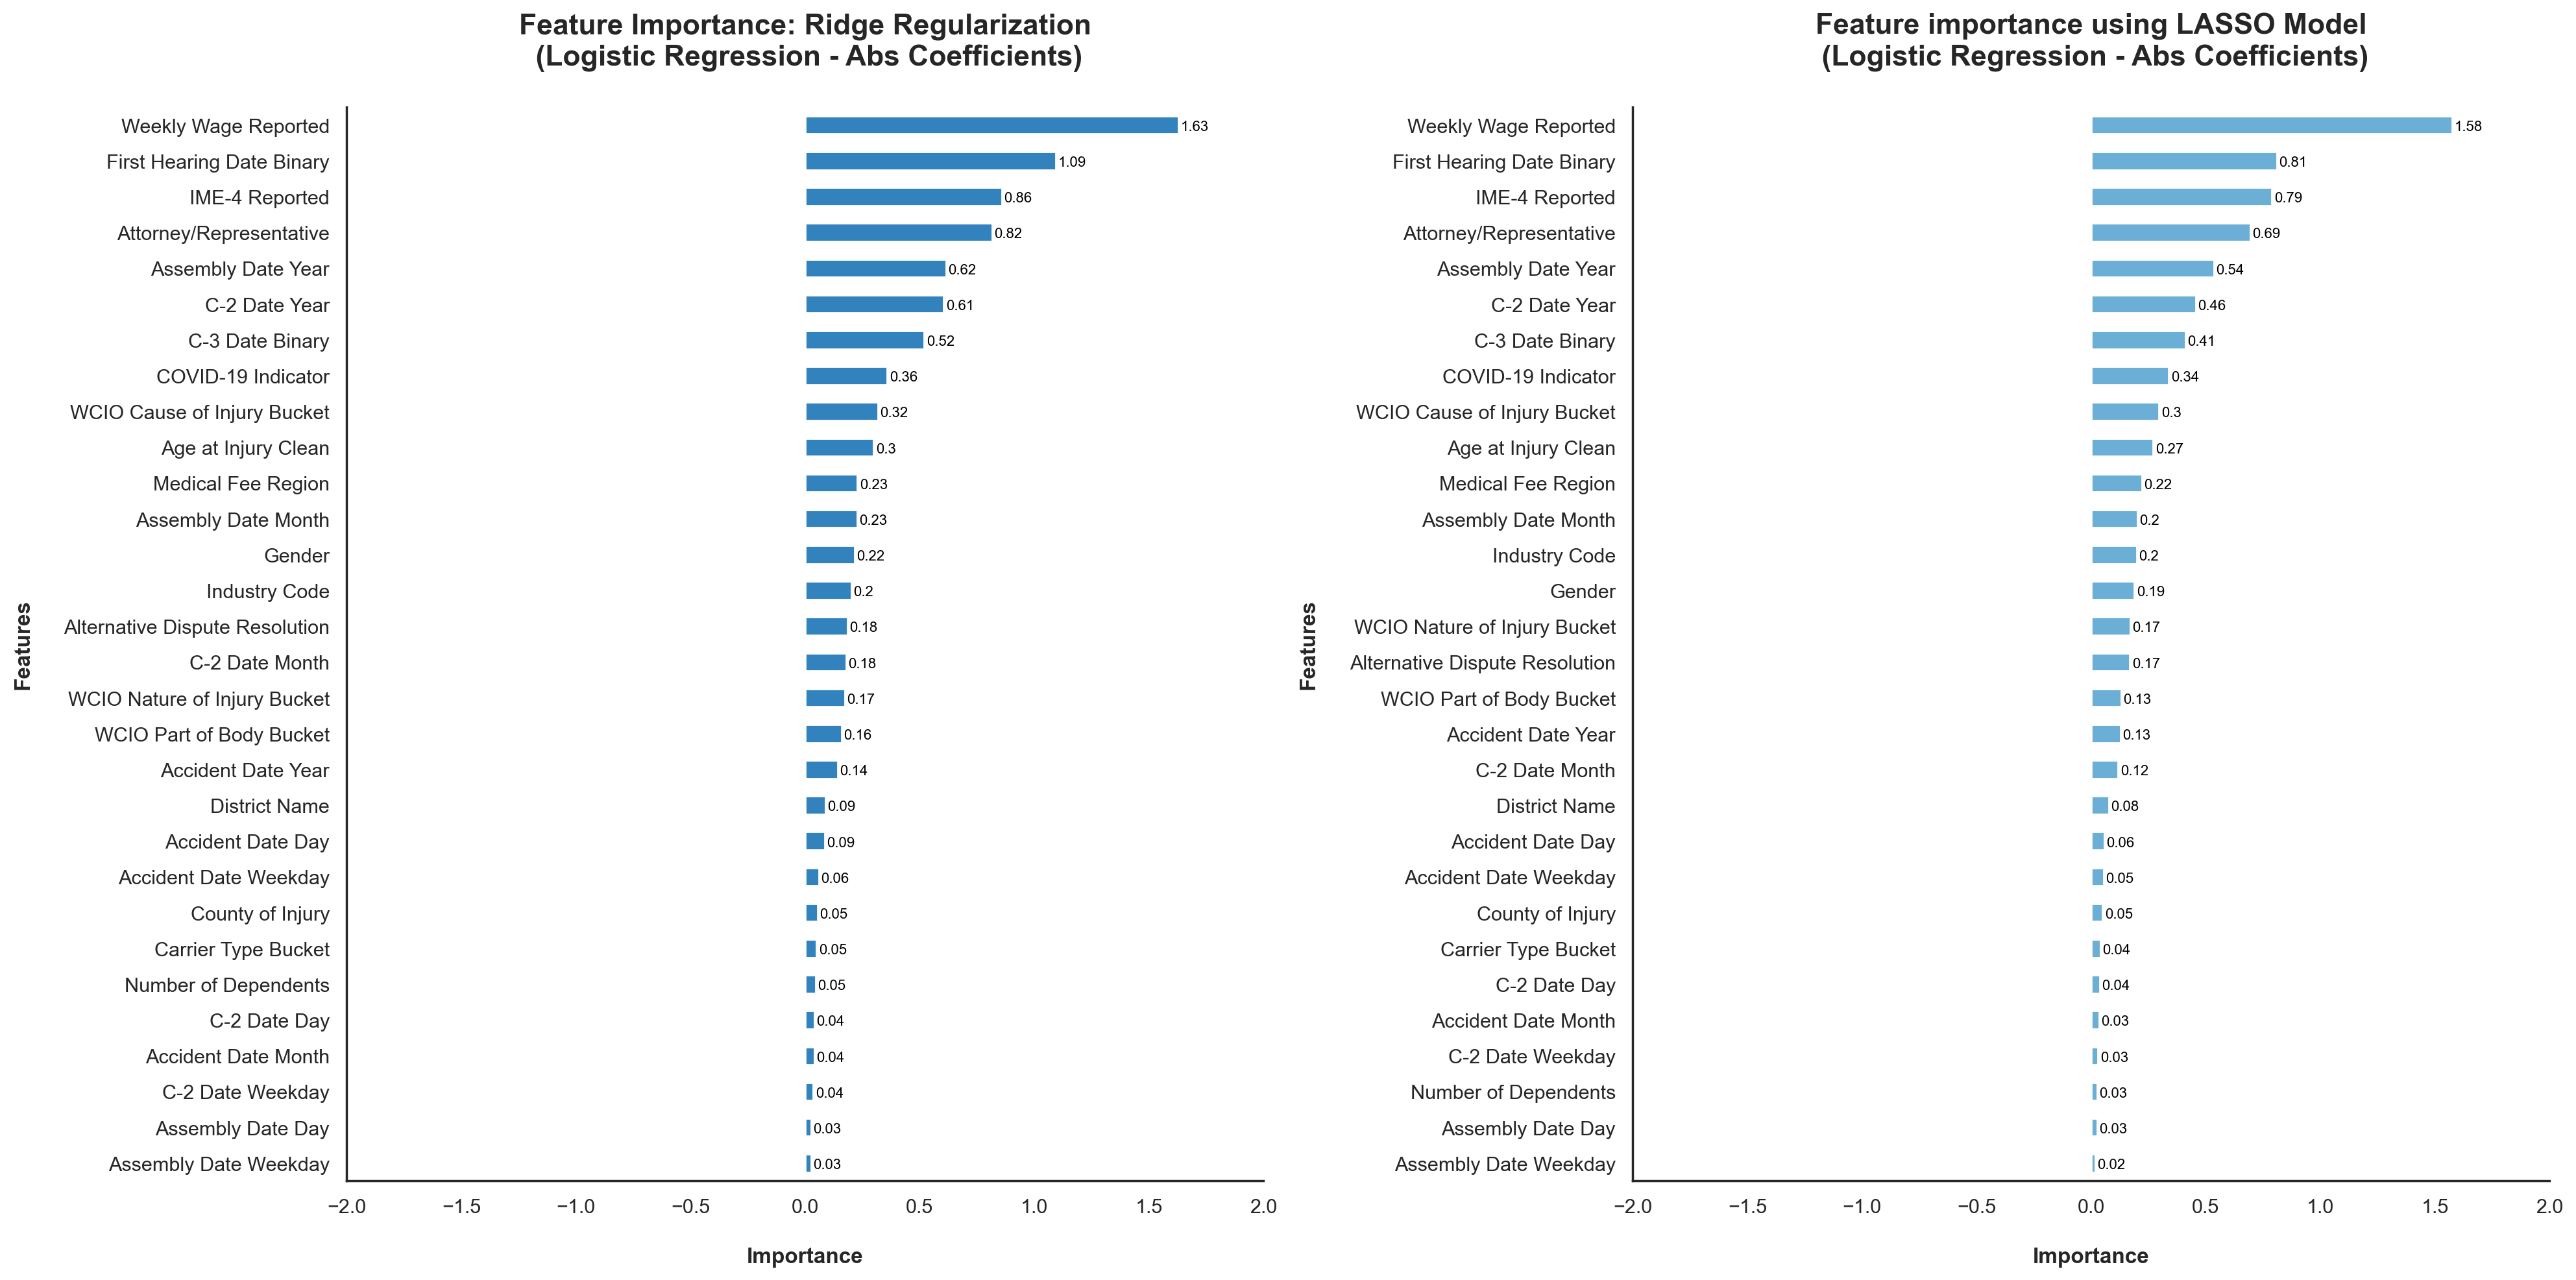

In [21]:
# Plot the importance of the features - Ridge Regularization & Lasso Regularization 
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the feature importance
ridge_import_coef.plot(kind='barh', color='#3182BD', ax=ax[0])
ax[0].set_title('Feature Importance: Ridge Regularization\n (Logistic Regression - Abs Coefficients)\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2, 2)

# Add the coefficients to the plot
for i in ax[0].patches:
    ax[0].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

# Plot the importance of the features
lasso_imp_coef.plot(kind='barh', color='#6BAED6', ax=ax[1])
ax[1].set_xlim(-2, 2)
ax[1].set_title("Feature importance using LASSO Model\n (Logistic Regression - Abs Coefficients)\n", fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Features\n', fontsize=12, fontweight='bold')

# Add the coefficients to the plot
for i in ax[1].patches:
    ax[1].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_LogisticRegression_ScaledData.png', dpi=300, bbox_inches='tight')
plt.show()

----

In [22]:
# ---------------------------------------------- One-Hot Encoding ----------------------------------------------
# Assign the features to the X and y variables for the Lasso and Ridge Regularization
X_ohe = X_train_ohe_norm.values
y_ohe = y_train_encoded.values

# Feature names
feature_names_ohe = X_train_ohe_norm.columns

# Lasso Regularization
lasso_selector_ohe = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                                penalty="l1",                      # Lasso
                                                                                solver='saga'),                    # Algorithm to use in the optimization problem
                                                                                max_features=len(feature_names_ohe),   # Maximum number of features to select
                                                                                threshold="1.25*mean").fit(X_ohe,y_ohe)    # Threshold for feature selection (need to transform the coef_ values)

lasso_selected_features_ohe = feature_names_ohe[lasso_selector_ohe.get_support()]

# Assign the features to the X and y variables for the Lasso Regularization
lasso_coef_ohe = pd.Series(abs(lasso_selector_ohe.estimator_.coef_).mean(axis=0)*1.25, index=feature_names_ohe)
lasso_imp_coef_ohe = lasso_coef_ohe.sort_values(ascending=True)

# Ridge Regularization
ridge_selector_ohe = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                                penalty="l2",                      # Ridge
                                                                                solver='sag',                      # Algorithm to use in the optimization problem
                                                                                max_iter=1000),                    # Ensure convergence
                                                                                max_features=len(feature_names_ohe),   # Maximum number of features to select
                                                                                threshold="1.25*mean").fit(X_ohe, y_ohe)   # Threshold for feature selection (need to transform the coef_ values)

ridge_selected_features_ohe = feature_names_ohe[ridge_selector_ohe.get_support()]

# Assign the coefficients to the selected features for the Ridge Regularization
ridge_coef_ohe = pd.Series(abs(ridge_selector_ohe.estimator_.coef_).mean(axis=0)*1.25, index=feature_names_ohe)
ridge_import_coef_ohe = ridge_coef_ohe.sort_values(ascending=True)

## Plot the results of the Lasso and Ridge Regularization
dtf_features_ohe = pd.DataFrame({"features": feature_names_ohe})
dtf_features_ohe["lasso"] = dtf_features_ohe["features"].apply(lambda x: "lasso" if x in lasso_selected_features_ohe else "")
dtf_features_ohe["num1"] = dtf_features_ohe["features"].apply(lambda x: 1 if x in lasso_selected_features_ohe else 0)

dtf_features_ohe["ridge"] = dtf_features_ohe["features"].apply(lambda x: "ridge" if x in ridge_selected_features_ohe else "")
dtf_features_ohe["num2"] = dtf_features_ohe["features"].apply(lambda x: 1 if x in ridge_selected_features_ohe else 0)

dtf_features_ohe["method"] = dtf_features_ohe[["lasso", "ridge"]].apply(lambda x: (x[0] + " " + x[1]).strip(), axis=1)
dtf_features_ohe["selection"] = dtf_features_ohe["num1"] + dtf_features_ohe["num2"]

## Time of Execution Ridge and Lasso Regularization - One-Hot Encoding = 27m 47s

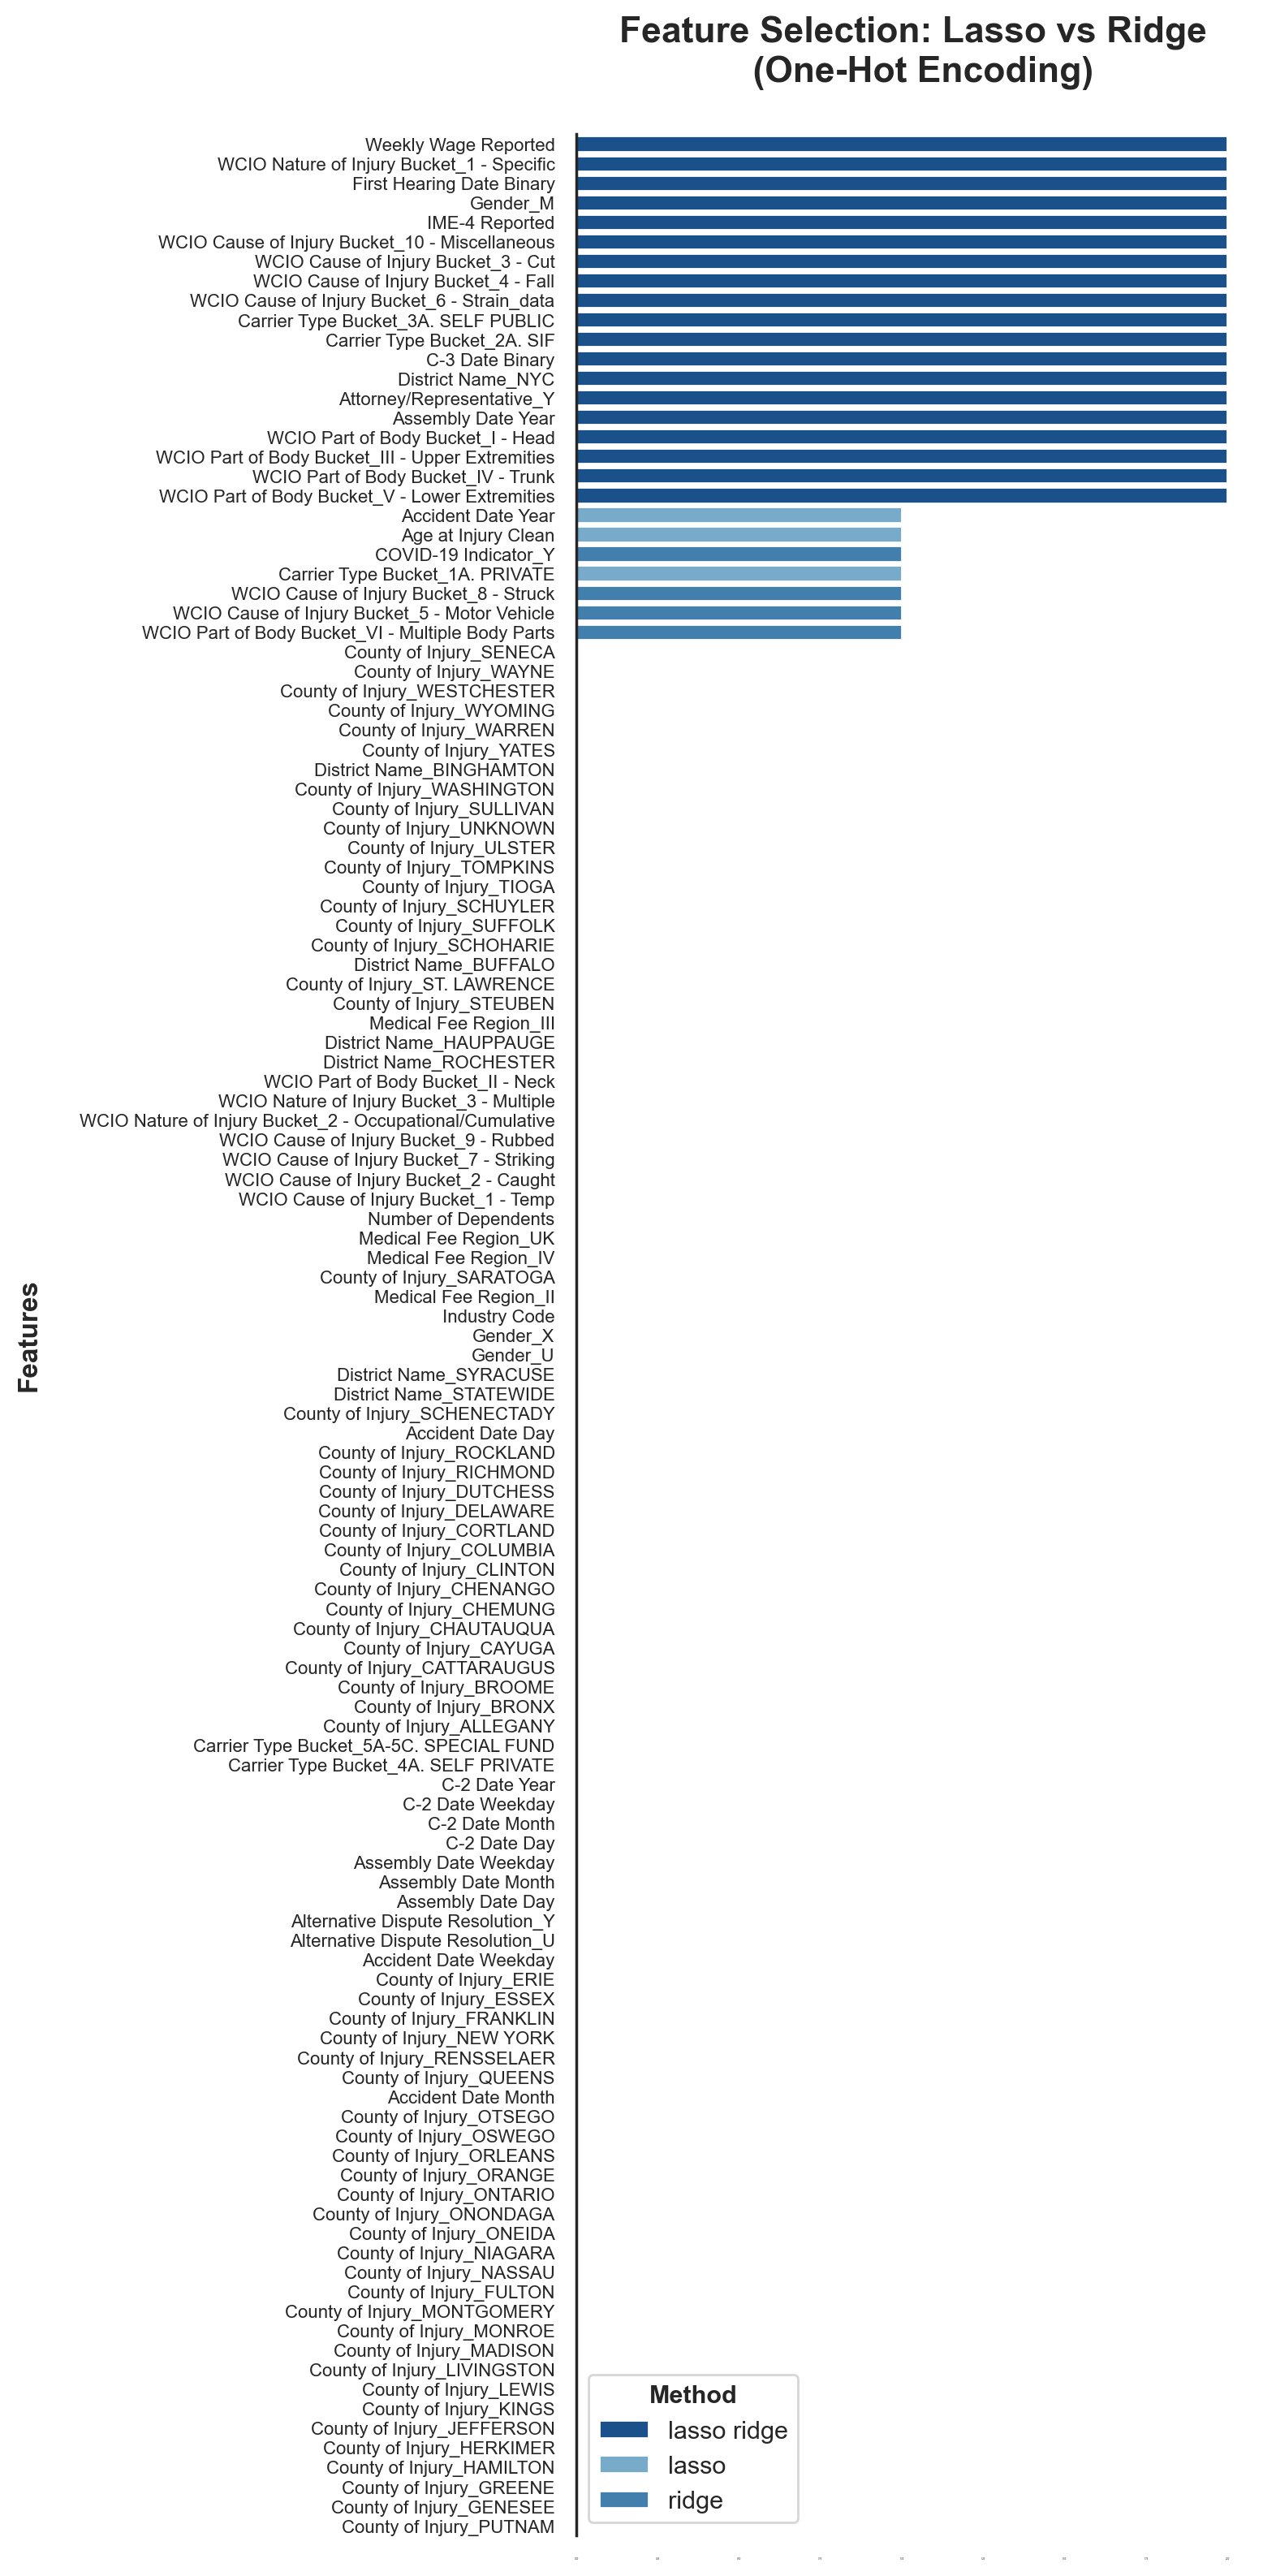

In [ ]:
# Plot the results of the Lasso and Ridge Regularization - One-Hot Encoding
plt.figure(figsize=(8, 16))
sns.barplot(y="features", x="selection", hue="method", 
            data=dtf_features_ohe.sort_values("selection", ascending=False), dodge=False,
            palette={"lasso": "#6BAED6", "ridge": "#3182BD", 'lasso ridge':'#08519C'})

plt.title('Feature Selection: Lasso vs Ridge \n (One-Hot Encoding)\n', fontsize=16, fontweight='bold')
plt.ylabel('Features\n', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.yticks(fontsize=8)
plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()
plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_OneHotEncoding_MinMaxScaler.png', dpi=300, bbox_inches='tight')
plt.show()

## Normal blue: Lasso
## light blue: Ridge
## Dark blue:  Both Lasso and Ridge

In [23]:
# Dataframe with the results
dtf_features_ohe.set_index('features', inplace=True)
dtf_features_ohe.sort_index(ascending=True, inplace=True)

# Save the results of the feature selection on Excel file - One-Hot Encoding
dtf_features_ohe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_OneHotEncoding_MinMaxScaler.xlsx')
dtf_features_ohe

lasso  num1  ridge  num2  \
features                                                                      
Accident Date Day                                            0            0   
Accident Date Month                                          0            0   
Accident Date Weekday                                        0            0   
Accident Date Year                                 lasso     1  ridge     1   
Age at Injury Clean                                lasso     1  ridge     1   
...                                                  ...   ...    ...   ...   
WCIO Part of Body Bucket_III - Upper Extremities   lasso     1  ridge     1   
WCIO Part of Body Bucket_IV - Trunk                lasso     1  ridge     1   
WCIO Part of Body Bucket_V - Lower Extremities     lasso     1  ridge     1   
WCIO Part of Body Bucket_VI - Multiple Body Parts  lasso     1  ridge     1   
Weekly Wage Reported                               lasso     1  ridge     1   

                                                        method  selection  
features                                                                   
Accident Date Day                                                       0  
Accident Date Month                                                     0  
Accident Date Weekday                                                   0  
Accident Date Year                                 lasso ridge          2  
Age at Injury Clean                                lasso ridge          2  
...                                                        ...        ...  
WCIO Part of Body Bucket_III - Upper Extremities   lasso ridge          2  
WCIO Part of Body Bucket_IV - Trunk                lasso ridge          2  
WCIO Part of Body Bucket_V - Lower Extremities     lasso ridge          2  
WCIO Part of Body Bucket_VI - Multiple Body Parts  lasso ridge          2  
Weekly Wage Reported                               lasso ridge          2  

[123 rows x 6 columns]

In [24]:
# Dataframe with the abs. coefficients of the Lasso and Ridge Regularization
lasso_ridge_coef_ohe = pd.DataFrame({'Lasso': lasso_imp_coef_ohe, 'Ridge': ridge_import_coef_ohe})
lasso_ridge_coef_ohe = lasso_ridge_coef_ohe.sort_values(by = ['Lasso', 'Ridge'], ascending = [False, False])

# Save the results of the Lasso and Ridge Regularization - Excel file with Model's name
lasso_ridge_coef_ohe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_OneHotEncoding_MinMaxScaler.xlsx')

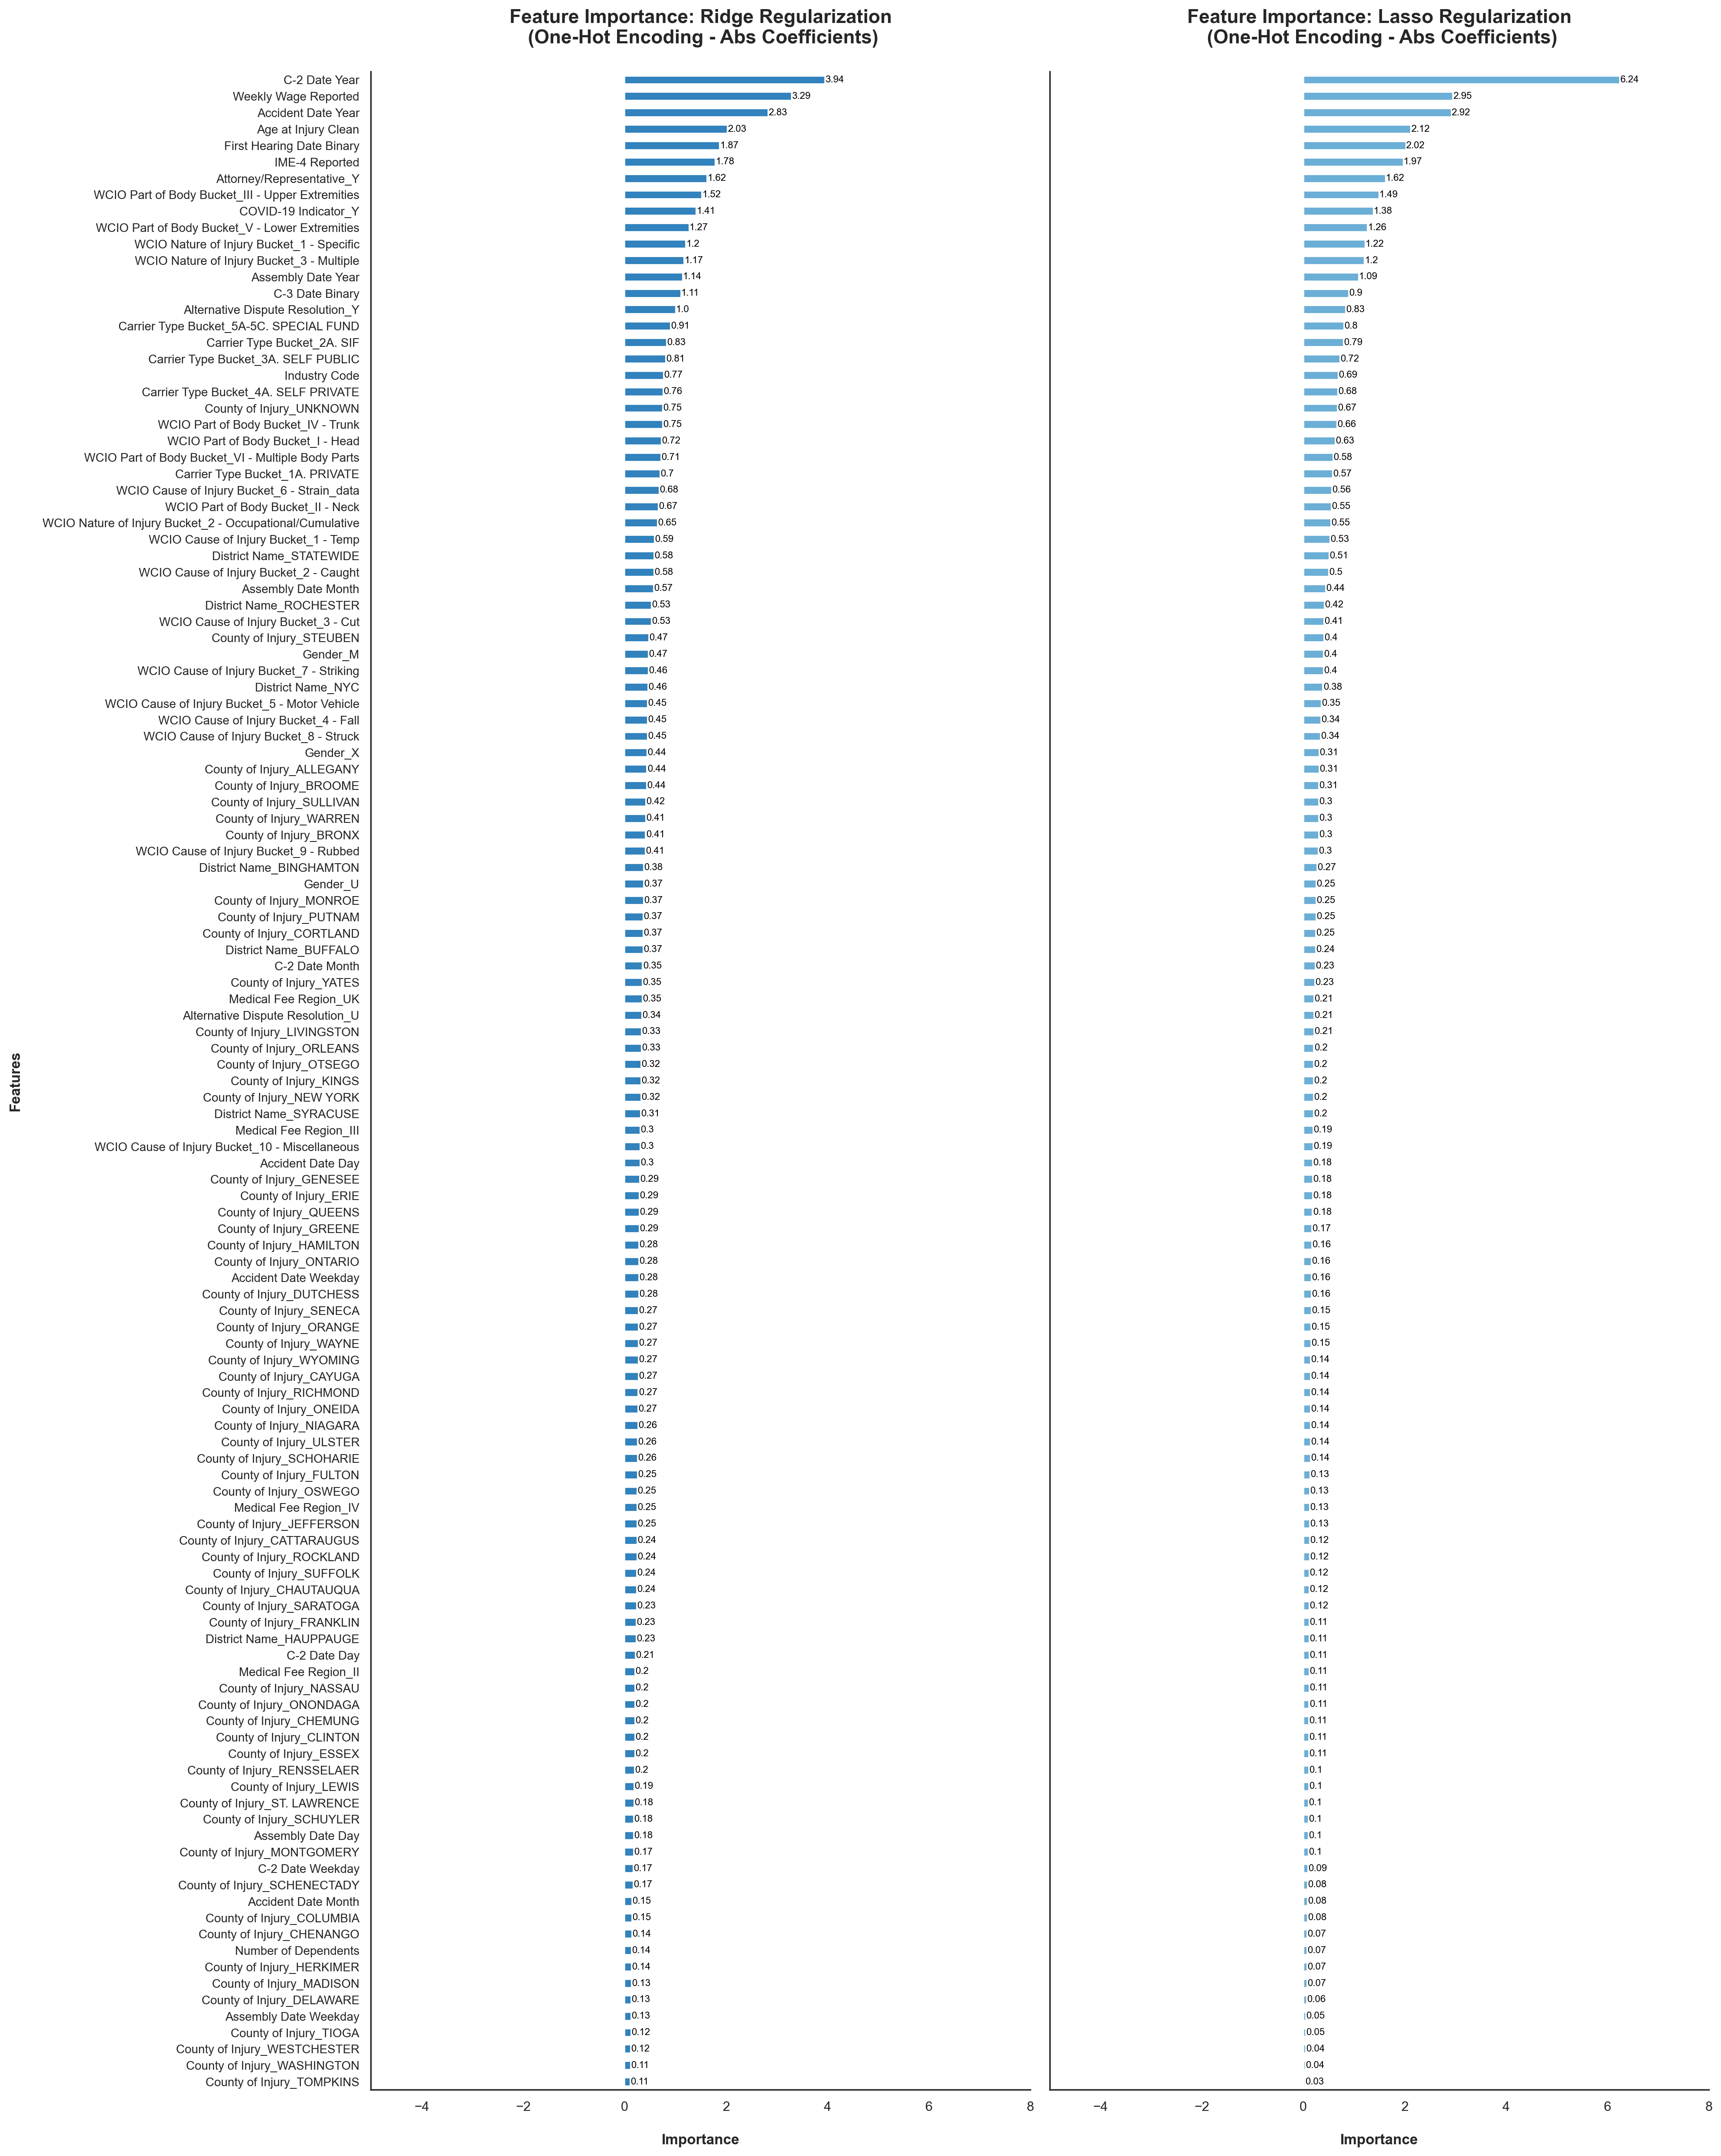

In [ ]:
# Plot the importance of the features - Ridge Regularization & Lasso Regularization
fig, ax = plt.subplots(1, 2, figsize=(20, 25), sharey=True)  # sharey=True to share the y-axis

# Plot Ridge Regularization feature importance
ridge_import_coef_ohe.plot(kind='barh', color='#3182BD', ax=ax[0])
ax[0].set_title('Feature Importance: Ridge Regularization\n (One-Hot Encoding - Abs Coefficients)\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax[0].set_xlim(-5, 8)

# Add the coefficients as labels to the plot
for patch in ax[0].patches:
    ax[0].text(patch.get_width() + 0.01, patch.get_y() + 0.1, str(round(patch.get_width(), 2)), fontsize=8, color='black')

# Plot Lasso Regularization feature importance
lasso_imp_coef_ohe.plot(kind='barh', color='#6BAED6', ax=ax[1])
ax[1].set_xlim(-5, 8)
ax[1].set_title("Feature Importance: Lasso Regularization\n (One-Hot Encoding - Abs Coefficients)\n", fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')

# Add the coefficients as labels to the plot
for patch in ax[1].patches:
    ax[1].text(patch.get_width() + 0.01, patch.get_y() + 0.1, str(round(patch.get_width(), 2)), fontsize=8, color='black')

# Set font size for y-ticks
ax[0].tick_params(axis='y', labelsize=10)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_OneHotEncoding_MinMaxScaler.png', dpi=300, bbox_inches='tight')
plt.show()

> One more time, we use different scaler methods to compare them, and the results are in the **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

----

### **Feature Selection | Key Notes**

#### **Numerical Data Summary**


<center><b>Table 1 | </b> Summary of Feature Selection for Numerical Variables <br><br>


| **#** | **Predictor**                  | **Correlation** | **Ridge (W/Standard Scaler)**     | **Lasso (W/Standard Scaler)**     | **RFE**       | **Multicollinearity? (VIF & Correlation)** | **What to do?**              |
|-------|--------------------------------|-----------------|-----------------------------------|-----------------------------------|---------------|-------------------------------------------|------------------------------|
| 1     | Accident Date Day              | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 2     | Accident Date Month            | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 3     | Accident Date Weekday          | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 4     | Accident Date Year             | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 5     | Age at Injury Clean            | Weak            | Not Selected                      | Not Selected                      | Selected      | No                                        | **Keep**                     |
| 6     | Assembly Date Day              | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 7     | Assembly Date Weekday          | Negligible      | Not Selected                      | Not Selected                      | Not Selected  | Yes?                                      | Discard                      |
| 8     | Assembly Date Month            | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes                                      | Discard                      |
| 9     | Assembly Date Year             | Negligible      | Selected                          | Selected                          | Selected      | Yes?                                      | Discard                      |
| 10    | C-2 Date Day                   | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 11    | C-2 Date Month                 | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 12    | C-2 Date Weekday               | Negligible      | Not Selected                      | Not Selected                      | Not Selected  | Yes?                                      | Discard                      |
| 13    | C-2 Date Year                  | Negligible      | Selected                          | Selected                          | Selected      | Yes?                                      | **Keep**                     |
| 14    | Industry Code                  | Negligible      | Not Selected                      | Not Selected                      | Selected      | No                                        | Discard         |
| 15    | Number of Dependents           | Negligible      | Not Selected                      | Not Selected                      | Selected      | No                                        | Discard                      |

<br>

</center> 

---


> **`?`** - Indicates variables with potential multicollinearity. Further analysis may be required for confirmation. <br>
> **Note:** Features with low or no selection across methods can likely be discarded to improve model efficiency.

---

#### **Categorical Data Summary**

<center><b>Table 2 | </b> Summary of Feature Selection for Categorical Variables <br><br>

| **#** | **Predictor**                      | **Chi-Square & Correlation** | **Ridge**     | **Lasso**     | **RFE**       | **Multicollinearity?** | **What to do?**              |
|-------|------------------------------------|----------------|---------------|---------------|---------------|-------------------------|------------------------------|
| 16    | Alternative Dispute Resolution     | Important + Negligible | Not Selected  | Not Selected  | Selected      | No                      |  Discard      |
| 17    | Attorney/Representative            | Important + Relatively Strong      | Selected       | Selected      | Selected      | No                      | **Keep**       |
| 18    | C-3 Date Binary                    | Important + Relatively Strong      | Selected      | Selected      | Selected      | No                      | **Keep**       |
| 19    | Carrier Type Bucket                | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 20    | County of Injury                   | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 21    | COVID-19 Indicator                 | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 22    | District Name                      | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 23    | First Hearing Date Binary          | Important + Relatively Strong      | Selected      | Selected      | Selected      | No                     | **Keep**     |
| 24    | Gender                             | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 25    | IME-4 Reported                     | Important + Relatively Strong          | Selected      | Selected      | Selected      | No                     | **Keep**     |
| 26    | Medical Fee Region                 | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 27    | WCIO Cause of Injury Bucket        | Important + Weak                   | Not Selected   | Not Selected | Selected      | No                     | **Keep**         |
| 28    | WCIO Nature of Injury Bucket       | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 29    | WCIO Part of Body Bucket           | Important + Weak                   | Not Selected  | Not Selected  | Selected      | No                     | **Keep**       |
| 30    | Weekly Wage Reported               | Important + Very Strong                 | Selected      | Selected      | Selected      | No                      | **Keep** |

</center>

<br>

---

> **Interpretation:** Categorical features with significant Chi-Square values are likely important for model predictions, but those not selected by Ridge, Lasso, or RFE can be discarded.

---

# 💾 Save Data 

In [ ]:
# # Save the training and validation sets
# X_train.to_parquet('data/2ndNotebook/X_train.parquet', engine='fastparquet')
# X_val.to_parquet('data/2ndNotebook/X_val.parquet', engine='fastparquet')
# y_train.to_frame().to_parquet('data/2ndNotebook/y_train.parquet', engine='fastparquet')
# y_val.to_frame().to_parquet('data/2ndNotebook/y_val.parquet', engine='fastparquet')

# # Save the test set
# test_data.to_parquet('data/2ndNotebook/test_data.parquet', engine='fastparquet')

---

# 🔗 Bibliography/References

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)** Stack Exchange. (2022), "OneHotEncoding Target Variable." https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable

**[[4]](https://www.statisticshowto.com/variance-inflation-factor/)** Glen, S. (2015, September 22). Variance Inflation Factor. Statistics How To. https://www.statisticshowto.com/variance-inflation-factor/

**[[5]](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)** StatsModels. (2024, October 29). statsmodels.stats.outliers_influence.variance_inflation_factor - statsmodels 0.15.0 (+302). Www.statsmodels.org. https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

**[[6]](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)** Brownlee, J. (2018, June 14). A Gentle Introduction to the Chi-Squared Test for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

**[[7]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)** Scikit-Learn. (2024). sklearn.feature_selection.RFE - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

**[[8]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)** Scikit-Learn. (2024). sklearn.feature_selection.SelectFromModel - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

**[[9]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2024). sklearn.linear_model.LogisticRegression - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[10]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)** Scikit-Learn. (2024). sklearn.linear_model.Ridge - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**[[11]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)** Scikit-Learn. (2024). sklearn.linear_model.Lasso - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html